In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

2024-04-05 16:09:02.073826: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered

2024-04-05 16:09:02.073950: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered

2024-04-05 16:09:02.237261: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv('/kaggle/input/phishing/dataset_full.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 88647 entries, 0 to 88646

Columns: 112 entries, qty_dot_url to phishing

dtypes: float64(1), int64(111)

memory usage: 75.7 MB


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Assuming df is your DataFrame

# Drop columns with only one unique value
for col in df.columns:
    unique_value_list = df[col].unique()
    if len(unique_value_list) == 1:
        df = df.drop(columns=col)

# Replace -1 with mean on each column


# Drop columns containing only the values [0, -1]
for col in df.columns:
    if set(df[col].unique()) == {0, -1}:
        df = df.drop(columns=col)
for col in df.columns:
    if -1 in df[col].unique():
        mean_value = int(df[col][df[col] != -1].mean())  # Calculate mean excluding -1
        df[col] = df[col].replace(-1, mean_value)


from sklearn.preprocessing import MinMaxScaler
target_column = 'phishing'  # Replace with the actual target column name
x = df.drop(target_column, axis=1)
scaler = MinMaxScaler()

# Apply Min-Max scaling to each column
for col in x.columns:
    # Reshape the column values to a 2D array to fit the scaler
    column_values = x[col].values.reshape(-1, 1)

    # Scale the values to the range [0, 1]
    x[col] = scaler.fit_transform(column_values)
df = pd.concat([x, df[target_column]], axis=1)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


target_column = 'phishing'  # Replace with the actual target column name
X = df.drop(target_column, axis=1)
correlation_matrix = X.corr()

# Set the threshold for high correlation
correlation_threshold = 0.8  # Adjust the threshold as needed
#0.8 gives 72, 0.7 gives 64
# Find features with high correlation with others
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Keep features with high correlation and remove others
selected_features = list(set(X.columns) - highly_correlated_features)
X_selected = X[selected_features]

# Add the target variable back to the selected features
df = pd.concat([X_selected, df[target_column]], axis=1)


In [5]:
df.head()

,qty_hyphen_url,qty_vowels_domain,asn_ip,file_length,qty_ip_resolved,tld_present_params,qty_redirects,time_response,server_client_domain,qty_at_domain,...,qty_space_file,qty_dollar_params,qty_hyphen_domain,qty_dot_domain,qty_and_directory,qty_dot_file,url_google_index,qty_equal_file,qty_plus_params,phishing
0,0.0,0.065574,0.153576,0.005682,0.0,0.0,0.000000,0.005399,0.0,0.0,...,0.0,0.0,0.0,0.095238,0.0,0.083333,0.0,0.0,0.0,1
1,0.0,0.081967,0.091019,0.007305,0.0,0.0,0.000000,0.013009,0.0,0.0,...,0.0,0.0,0.0,0.095238,0.0,0.083333,0.0,0.0,0.0,1
2,0.0,0.049180,0.012035,0.000000,0.0,0.0,0.000000,0.024371,0.0,0.0,...,0.0,0.0,0.0,0.095238,0.0,0.000000,0.0,0.0,0.0,0
3,0.0,0.114754,0.051676,0.007305,0.0,0.0,0.000000,0.010677,0.0,0.0,...,0.0,0.0,0.0,0.095238,0.0,0.083333,0.0,0.0,0.0,1
4,0.0,0.081967,0.136015,0.005682,0.0,0.0,0.058824,0.010696,0.0,0.0,...,0.0,0.0,0.0,0.095238,0.0,0.000000,0.0,0.0,0.0,0


In [6]:
X = df.drop('phishing', axis=1)
y = df['phishing'].values

In [7]:
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
# Model 1: Feedforward Neural Network (FNN)
def create_feedforward_neural_network():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


#Model 2:dnn
def create_dnn_model():
    model = Sequential()
    
    # Dense (MLP) layers
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

#model 3:
def build_wide_deep_model(input_shape):
    # Define the wide and deep model using Functional API
    wide_input = Input(shape=(input_shape,))
    deep_input = Input(shape=(input_shape,))

    wide_model = Dense(32, activation='relu')(wide_input)
    wide_model = Dense(16, activation='relu')(wide_model)

    deep_model = Dense(64, activation='relu')(deep_input)
    deep_model = Dense(32, activation='relu')(deep_model)

    combined_model = Concatenate()([wide_model, deep_model])
    output_layer = Dense(1, activation='sigmoid')(combined_model)

    model = Model(inputs=[wide_input, deep_input], outputs=output_layer)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model







In [8]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
# Assuming df is your dataframe
# X = df.drop('phishing', axis=1)
# y = df['phishing'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

from sklearn.metrics import accuracy_score

# Define a custom scoring function
def custom_scorer(model, X, y):
    y_pred_binary = (model.predict(X) > 0.5).astype(int)
    return accuracy_score(y, y_pred_binary)
all_importances = []

In [9]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.neural_network import MLPClassifier  # Assuming you're using an MLP

# Model 1: Feedforward Neural Network (FNN)
model_fnn = create_feedforward_neural_network()
model_fnn.fit(X_train_standardized, y_train)

# Apply permutation importance using the custom scorer
result = permutation_importance(model_fnn, X_test, y_test, scoring=custom_scorer, n_repeats=10, random_state=42)

# Get feature importances
feature_importance = result.importances_mean
all_importances.append(feature_importance)
# Get the indices of the top features
top_indices = np.argsort(-feature_importance)[:20]

# Get the names of the top features
top_features = X.columns[top_indices]

# Print the names of the top features
print("Top Features:")
for feature in top_features:
    print(feature)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2217/2217 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9135 - loss: 0.2177

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [10]:
perm = PermutationImportance(model_fnn, random_state=1, scoring=custom_scorer).fit(X_test, y_test)

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

In [11]:
eli5.show_weights(perm, feature_names=X.columns.tolist())

Weight,Feature
0.0907 ± 0.0034,time_domain_activation
0.0373 ± 0.0010,qty_slash_url
0.0079 ± 0.0010,length_url
0.0062 ± 0.0008,url_shortened
0.0055 ± 0.0018,tls_ssl_certificate
0.0050 ± 0.0013,domain_spf
0.0043 ± 0.0002,tld_present_params
0.0041 ± 0.0006,qty_dot_directory
0.0038 ± 0.0006,qty_dot_domain
0.0025 ± 0.0005,qty_nameservers


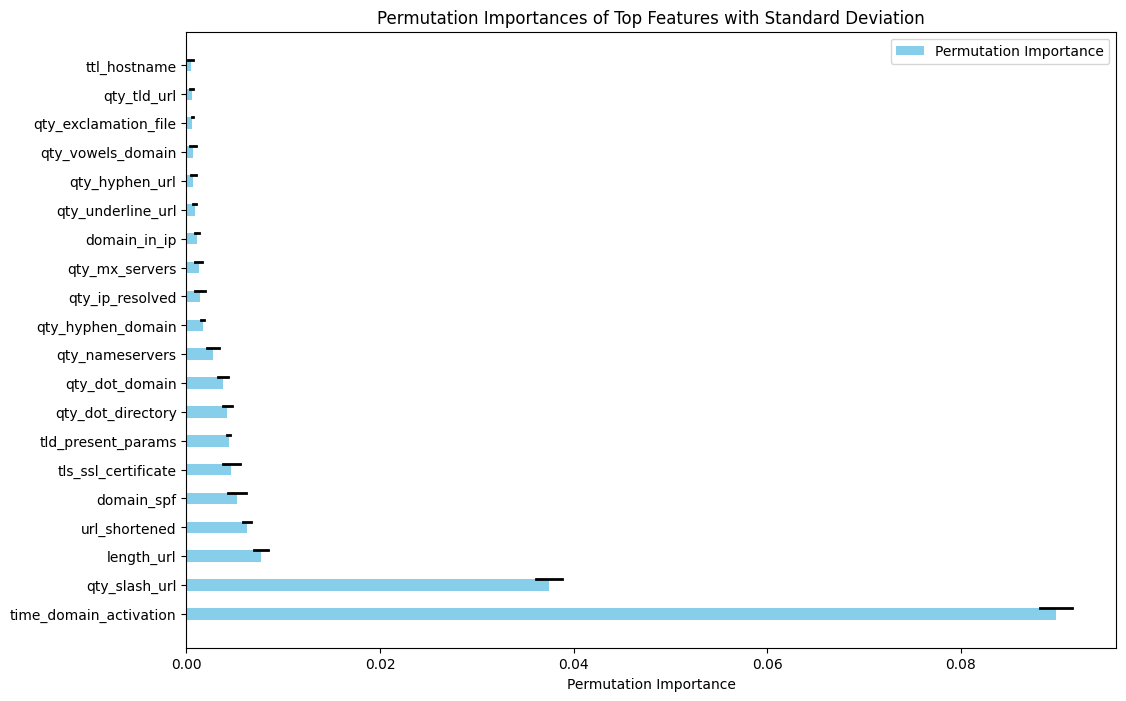

In [12]:
import numpy as np
import matplotlib.pyplot as plt
std_deviation = result.importances_std
# Create a bar chart for permutation importances with standard deviation on x-axis
plt.figure(figsize=(12, 8))
bar_width = 0.4

# Bar chart for permutation importances
bars = plt.barh(np.arange(len(top_features)), feature_importance[top_indices], height=bar_width, label='Permutation Importance', color='skyblue')

# Error bars representing standard deviation
for i, (value, std) in enumerate(zip(feature_importance[top_indices], std_deviation[top_indices])):
    plt.plot([value - std, value + std], [i + bar_width / 2, i + bar_width / 2], color='black', linewidth=2)

plt.yticks(np.arange(len(top_features)), top_features)
plt.xlabel('Permutation Importance')
plt.title('Permutation Importances of Top Features with Standard Deviation')
plt.legend()
plt.show()

In [13]:
from keras.layers import Dense, Flatten
from keras.models import Sequential

# Assuming X_train is a 2D array, where each row represents a sample
# Reshape it to have 2 dimensions: (number_of_samples, features)
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))

def custom_sco(model, X, y):
    # Reshape the input data to have the required dimensions
    X_reshaped = np.reshape(X, (X.shape[0], X.shape[1]))
    
    # Predictions
    y_pred_binary = (model.predict(X_reshaped) > 0.5).astype(int)
    
    return accuracy_score(y, y_pred_binary)



model_dnn = create_dnn_model()
model_dnn.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Permutation importance analysis
result_dnn = permutation_importance(model_dnn, X_test, y_test, scoring=custom_sco, n_repeats=10, random_state=42)

# Get feature importances
feature_importance_dnn = result_dnn.importances_mean
all_importances.append(feature_importance_dnn)

# Get the indices of the top features
top_indices_dnn = np.argsort(-feature_importance_dnn)[:20]

# Get the names of the top features
top_features_dnn = X.columns[top_indices_dnn]

# Print the names of the top features
print("Top Features (DNN):")
for feature in top_features_dnn:
    print(feature)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1773/1773 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8463 - loss: 0.3330 - val_accuracy: 0.9169 - val_loss: 0.1943

Epoch 2/10

1773/1773 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9150 - loss: 0.2021 - val_accuracy: 0.9262 - val_loss: 0.1775

Epoch 3/10

1773/1773 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9203 - loss: 0.1871 - val_accuracy: 0.9258 - val_loss: 0.1681

Epoch 4/10

1773/1773 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9244 - loss: 0.1763 - val_accuracy: 0.9301 - val_loss: 0.1596

Epoch 5/10

1773/1773 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9278 - loss: 0.1699 - val_accuracy: 0.9286 - val_loss: 0.1707

Epoch 6/10

1773/1773 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9314 - loss: 0.1635 - val_accuracy: 0.9361 - val_loss: 0.1489

Epoch 7/10

1773/1773 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9357 - loss: 0.1557 - val_accuracy: 0.9389 - val_loss: 0.1427

Epoch 8/10

1773/1773 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9362 - loss: 0.1554

In [14]:
from eli5.sklearn import PermutationImportance
perm_lstm_mlp = PermutationImportance(model_dnn, random_state=1, scoring=custom_sco).fit(X_test, y_test)
eli5.show_weights(perm_lstm_mlp, feature_names=X.columns.tolist())

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

Weight,Feature
0.1792 ± 0.0033,qty_slash_url
0.0433 ± 0.0024,time_domain_activation
0.0374 ± 0.0029,length_url
0.0169 ± 0.0017,qty_mx_servers
0.0106 ± 0.0009,tld_present_params
0.0094 ± 0.0008,qty_at_params
0.0077 ± 0.0015,tls_ssl_certificate
0.0075 ± 0.0013,directory_length
0.0072 ± 0.0005,url_shortened
0.0071 ± 0.0015,qty_nameservers


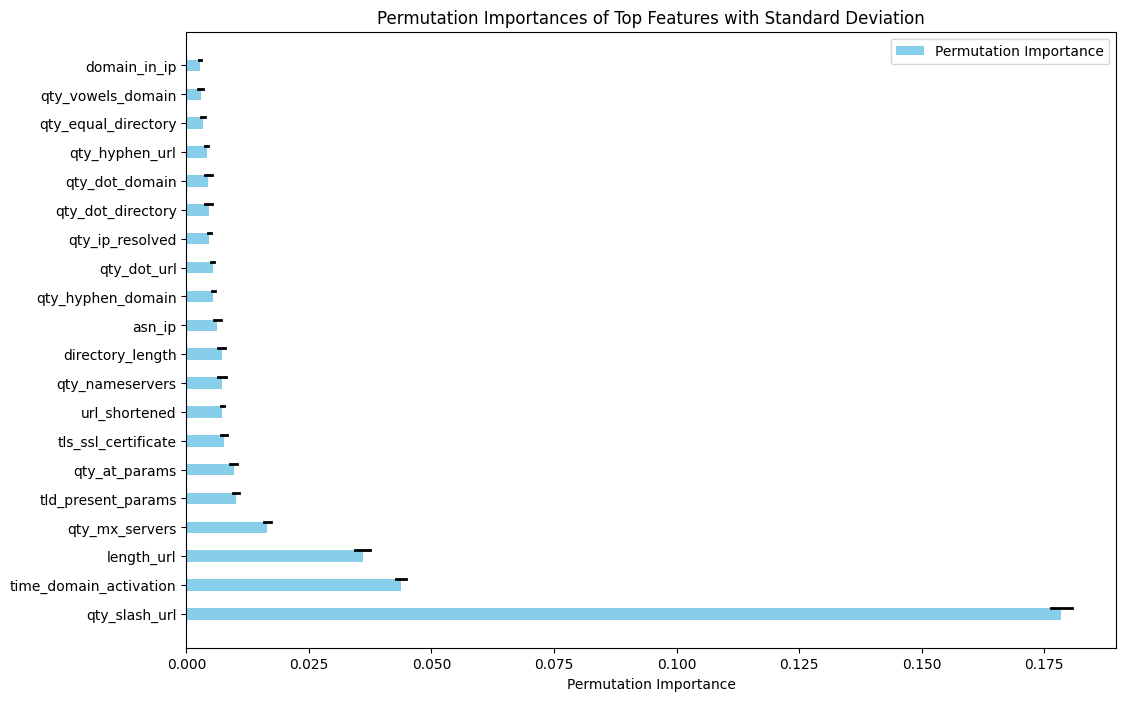

In [15]:
import numpy as np
import matplotlib.pyplot as plt
std_deviation = result_dnn.importances_std
# Create a bar chart for permutation importances with standard deviation on x-axis
plt.figure(figsize=(12, 8))
bar_width = 0.4

# Bar chart for permutation importances
bars = plt.barh(np.arange(len(top_features_dnn)), feature_importance_dnn[top_indices_dnn], height=bar_width, label='Permutation Importance', color='skyblue')

# Error bars representing standard deviation
for i, (value, std) in enumerate(zip(feature_importance_dnn[top_indices_dnn], std_deviation[top_indices_dnn])):
    plt.plot([value - std, value + std], [i + bar_width / 2, i + bar_width / 2], color='black', linewidth=2)

plt.yticks(np.arange(len(top_features_dnn)), top_features_dnn)
plt.xlabel('Permutation Importance')
plt.title('Permutation Importances of Top Features with Standard Deviation')
plt.legend()
plt.show()

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score

# Assuming X and y are already defined

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = build_wide_deep_model(input_shape=X_train.shape[1])

# Train the model
model.fit([X_train_scaled, X_train_scaled], y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred = model.predict([X_test_scaled, X_test_scaled])
accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
print(f'Model accuracy on test data: {accuracy * 100:.2f}%')

# Create a custom scorer function
def custom_scorer(estimator, X, y):
    y_pred = estimator.predict([X, X])
    return accuracy_score(y, (y_pred > 0.5).astype(int))

# Calculate permutation importance
result = permutation_importance(model, X_test_scaled, y_test, scoring=custom_scorer, n_repeats=10, random_state=42)

# Get feature importances
feature_importances = result.importances_mean
all_importances.append(feature_importances)

top_feature_indices = np.argsort(-feature_importances)[:20]

# Get the names of the top features
top_features_deep = X.columns[top_indices_dnn]

# Print the names of the top features
print("Top Features (DNN):")
for feature in top_features_deep:
    print(feature)



Epoch 1/10

887/887 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8814 - loss: 0.2821 - val_accuracy: 0.9399 - val_loss: 0.1497

Epoch 2/10

887/887 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9410 - loss: 0.1485 - val_accuracy: 0.9481 - val_loss: 0.1317

Epoch 3/10

887/887 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9461 - loss: 0.1369 - val_accuracy: 0.9500 - val_loss: 0.1313

Epoch 4/10

887/887 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9516 - loss: 0.1259 - val_accuracy: 0.9499 - val_loss: 0.1306

Epoch 5/10

887/887 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9519 - loss: 0.1229 - val_accuracy: 0.9559 - val_loss: 0.1196

Epoch 6/10

887/887 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9558 - loss: 0.1196 - val_accuracy: 0.9570 - val_loss: 0.1217

Epoch 7/10

887/887 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9579 - loss: 0.1106 - val_accuracy: 0.9584 - val_loss: 0.1167

Epoch 8/10

887/887 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9599 - loss: 0.1076 - v

In [17]:
import eli5
from eli5.sklearn import PermutationImportance

# Continue from the previous code...

# Convert the custom scorer function to work with PermutationImportance
def custom_scorer_permutation(estimator, X, y):
    y_pred = estimator.predict([X, X])
    return accuracy_score(y, (y_pred > 0.5).astype(int))

# Calculate permutation importance using eli5
perm = PermutationImportance(model, scoring=custom_scorer_permutation, n_iter=10, random_state=42)
perm.fit(X_test_scaled, y_test)

# Display the permutation importance using eli5
eli5.show_weights(perm, feature_names=X.columns.tolist())



555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

Weight,Feature
0.1249 ± 0.0045,qty_slash_url
0.1017 ± 0.0030,length_url
0.0373 ± 0.0027,time_domain_activation
0.0184 ± 0.0012,file_length
0.0148 ± 0.0020,directory_length
0.0143 ± 0.0018,qty_dot_domain
0.0129 ± 0.0010,qty_mx_servers
0.0117 ± 0.0009,qty_at_url
0.0082 ± 0.0015,time_domain_expiration
0.0073 ± 0.0012,qty_nameservers


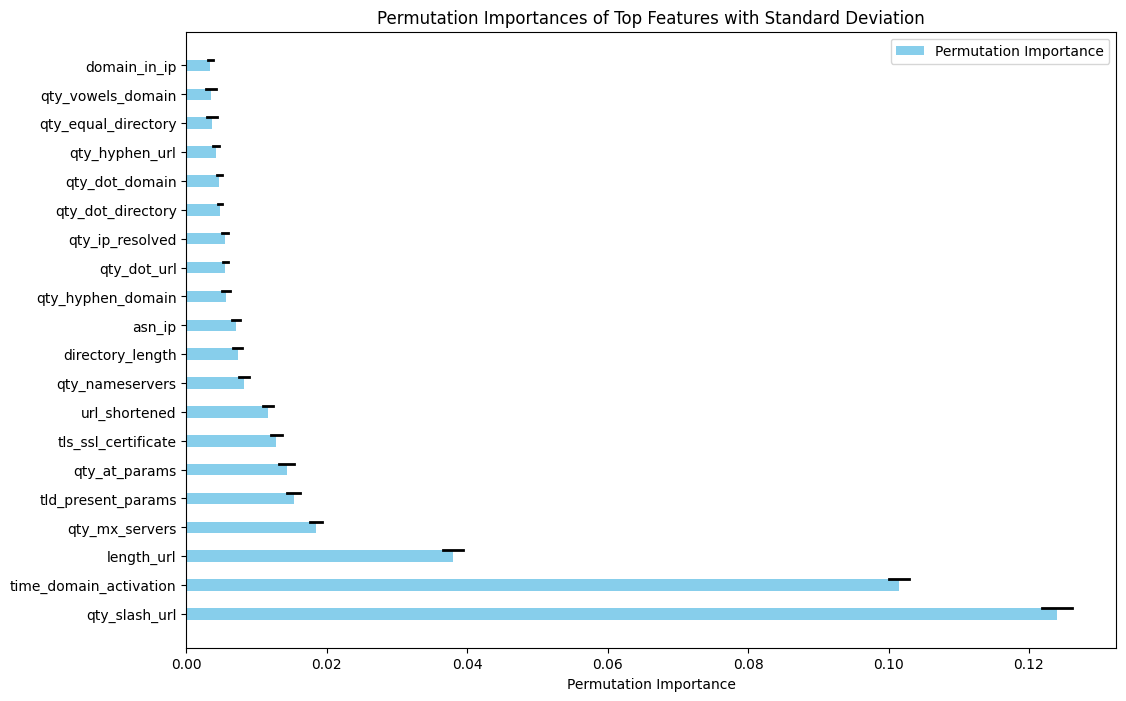

In [18]:

import numpy as np
import matplotlib.pyplot as plt
std_deviation = result.importances_std
# Create a bar chart for permutation importances with standard deviation on x-axis
plt.figure(figsize=(12, 8))
bar_width = 0.4

# Bar chart for permutation importances
bars = plt.barh(np.arange(len(top_feature_indices)), feature_importances[top_feature_indices], height=bar_width, label='Permutation Importance', color='skyblue')

# Error bars representing standard deviation
for i, (value, std) in enumerate(zip(feature_importances[top_feature_indices], std_deviation[top_feature_indices])):
    plt.plot([value - std, value + std], [i + bar_width / 2, i + bar_width / 2], color='black', linewidth=2)

plt.yticks(np.arange(len(top_feature_indices)), top_features_deep)
plt.xlabel('Permutation Importance')
plt.title('Permutation Importances of Top Features with Standard Deviation')
plt.legend()
plt.show()

In [19]:
!pip install pytorch-tabnet


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

  pid, fd = os.forkpty()




















   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.4 MB/s eta 0:00:00




In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.utils import PredictDataset
from sklearn.inspection import permutation_importance

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Create TabNet Pretrainer for pretraining
pretrainer = TabNetPretrainer()
pretrainer.fit(X_train_standardized)

# Create TabNet model for classification
tabnet_params = {"input_dim": X_train_standardized.shape[1], "output_dim": 1, "n_d": 8, "n_a": 8, "n_steps": 3}
model_tabnet = TabNetClassifier(**tabnet_params)

# Early stopping criteria
max_epochs = 100
patience = 10
best_accuracy = 0
counter = 0

# Training loop with early stopping
for epoch in range(max_epochs):
    model_tabnet.fit(
        X_train_standardized, y_train,
        eval_set=[(X_test_standardized, y_test)],
        eval_metric=['accuracy'],
        max_epochs=1,
        patience=patience,  # Set patience here
        batch_size=256,
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False,
        from_unsupervised=pretrainer
    )

    # Evaluate model on test set
    y_pred = model_tabnet.predict(X_test_standardized)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"epoch {epoch} | Test Accuracy: {accuracy:.5f}")

    # Early stopping
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        counter = 0
        # Save the best model
        model_tabnet.save_model("best_model_tabnet")
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping")
            break

# Load the best model
best_model_tabnet = TabNetClassifier()
best_model_tabnet.load_model("best_model_tabnet.zip")

# Check model predictions
y_pred_proba = best_model_tabnet.predict_proba(X_test_standardized)[:, 1]
y_pred_binary = (y_pred_proba > 0.5).astype(int)

# Print the accuracy
print("Best Test Accuracy:", best_accuracy)

# Apply permutation importance
test_dataset = PredictDataset(X_test_standardized)
result_tabnet = permutation_importance(best_model_tabnet, test_dataset, y_test, scoring='accuracy', n_repeats=10, random_state=42)

# Get feature importances
feature_importance = result_tabnet.importances_mean
all_importances.append(feature_importance)

# Get the indices of the top features
top_indices = np.argsort(-feature_importance)[:20]

# Get the names of the top features
top_features = X.columns[top_indices]

# Print the names of the top features
print("Top Features:")
for feature in top_features:
    print(feature)


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.

  warnings.warn(wrn_msg)


epoch 0  | loss: -42382.0648|  0:00:05s

epoch 1  | loss: -1893362.98822|  0:00:11s

epoch 2  | loss: -16335247.63768|  0:00:16s

epoch 3  | loss: -67901416.6087|  0:00:22s

epoch 4  | loss: -181850504.34783|  0:00:28s

epoch 5  | loss: -403810556.52174|  0:00:34s

epoch 6  | loss: -756101523.47826|  0:00:40s

epoch 7  | loss: -1230228210.08696|  0:00:46s

epoch 8  | loss: -1815267823.30435|  0:00:51s

epoch 9  | loss: -2498442803.94203|  0:00:57s

epoch 10 | loss: -3298689842.08696|  0:01:02s

epoch 11 | loss: -4315945609.27536|  0:01:08s

epoch 12 | loss: -5597933252.63768|  0:01:14s

epoch 13 | loss: -6917782394.43478|  0:01:19s

epoch 14 | loss: -9137779177.73913|  0:01:25s

epoch 15 | loss: -11295527564.98551|  0:01:30s

epoch 16 | loss: -14166185642.66666|  0:01:36s

epoch 17 | loss: -17486627231.53624|  0:01:43s

epoch 18 | loss: -21394402363.36232|  0:01:49s

epoch 19 | loss: -25414373346.31884|  0:01:54s

epoch 20 | loss: -30806738558.14493|  0:02:00s

epoch 21 | loss: -377442

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.28648 | val_0_accuracy: 0.91089 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_accuracy = 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 0 | Test Accuracy: 0.91089

Successfully saved model at best_model_tabnet.zip


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.28648 | val_0_accuracy: 0.91089 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_accuracy = 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 1 | Test Accuracy: 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.28648 | val_0_accuracy: 0.91089 |  0:00:10s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_accuracy = 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 2 | Test Accuracy: 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.28648 | val_0_accuracy: 0.91089 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_accuracy = 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 3 | Test Accuracy: 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.28648 | val_0_accuracy: 0.91089 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_accuracy = 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 4 | Test Accuracy: 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.28648 | val_0_accuracy: 0.91089 |  0:00:10s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_accuracy = 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 5 | Test Accuracy: 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.28648 | val_0_accuracy: 0.91089 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_accuracy = 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 6 | Test Accuracy: 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.28648 | val_0_accuracy: 0.91089 |  0:00:10s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_accuracy = 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 7 | Test Accuracy: 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.28648 | val_0_accuracy: 0.91089 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_accuracy = 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 8 | Test Accuracy: 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.28648 | val_0_accuracy: 0.91089 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_accuracy = 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 9 | Test Accuracy: 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.28648 | val_0_accuracy: 0.91089 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_accuracy = 0.91089


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 10 | Test Accuracy: 0.91089

Early stopping


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")


Best Test Accuracy: 0.9108855047941342

Top Features:

qty_slash_url

length_url

time_domain_activation

qty_dot_directory

url_shortened

qty_underline_url

qty_dot_domain

qty_hyphen_domain

qty_ip_resolved

qty_hyphen_params

qty_hyphen_url

qty_equal_directory

qty_slash_params

qty_percent_url

time_domain_expiration

qty_exclamation_file

qty_vowels_domain

qty_underline_directory

qty_and_file

qty_equal_params


In [21]:



import eli5
from eli5.sklearn import PermutationImportance

# Assuming you already have the `model_tabnet` and data (`X_test_standardized`, `y_test`)
# Define a custom scoring function
def custom_scorer(model, X, y):
    y_pred_proba = model.predict_proba(X)[:, 1]
    return accuracy_score(y, (y_pred_proba > 0.5).astype(int))

# Fit PermutationImportance on the model with the custom scoring function
perm_importance = PermutationImportance(model_tabnet, scoring=custom_scorer, random_state=42).fit(X_test_standardized, y_test)

# Display the results using eli5
eli5.show_weights(perm_importance, feature_names=X.columns.tolist(), show_feature_values=True)




Weight,Feature
0.1705 ± 0.0040,qty_slash_url
0.0331 ± 0.0024,length_url
0.0201 ± 0.0028,time_domain_activation
0.0172 ± 0.0026,qty_dot_directory
0.0075 ± 0.0003,url_shortened
0.0069 ± 0.0011,qty_underline_url
0.0061 ± 0.0017,qty_dot_domain
0.0053 ± 0.0010,qty_hyphen_domain
0.0044 ± 0.0017,qty_ip_resolved
0.0021 ± 0.0003,qty_hyphen_params


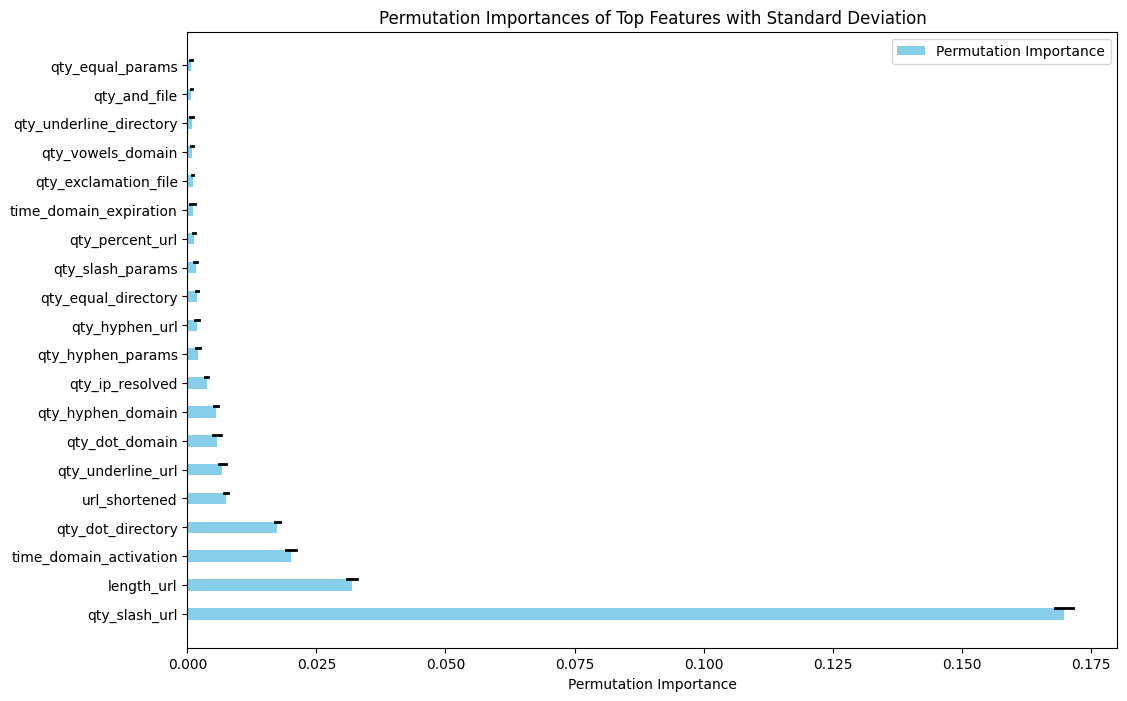

In [22]:
import numpy as np
import matplotlib.pyplot as plt
std_deviation = result_tabnet.importances_std
# Create a bar chart for permutation importances with standard deviation on x-axis
plt.figure(figsize=(12, 8))
bar_width = 0.4

# Bar chart for permutation importances
bars = plt.barh(np.arange(len(top_features)), feature_importance[top_indices], height=bar_width, label='Permutation Importance', color='skyblue')

# Error bars representing standard deviation
for i, (value, std) in enumerate(zip(feature_importance[top_indices], std_deviation[top_indices])):
    plt.plot([value - std, value + std], [i + bar_width / 2, i + bar_width / 2], color='black', linewidth=2)

plt.yticks(np.arange(len(top_features)), top_features)
plt.xlabel('Permutation Importance')
plt.title('Permutation Importances of Top Features with Standard Deviation')
plt.legend()
plt.show()

In [23]:
#final result
# Calculate the average importance across all models
average_importance = np.mean(all_importances, axis=0)

# Get the indices of the top features
top_indices = np.argsort(-average_importance)[:20]

# Get the names of the top features
top_features = X.columns[top_indices]

# Print the names of the top features
print("Top Features:")
for feature in top_features:
    print(feature)

Top Features:

qty_slash_url

time_domain_activation

length_url

qty_mx_servers

qty_dot_directory

qty_dot_domain

url_shortened

directory_length

file_length

tls_ssl_certificate

qty_nameservers

qty_at_params

qty_ip_resolved

tld_present_params

qty_hyphen_domain

qty_at_url

qty_vowels_domain

qty_hyphen_url

time_domain_expiration

domain_spf


In [24]:
from tabulate import tabulate

# Create a list of tuples containing feature names and their corresponding average importance values
average_importance_eli5 = [(feature, importance) for feature, importance in zip(top_features, average_importance)]

# Display feature importances in a nice-looking table format
print("Top Features:")
print(tabulate(average_importance_eli5, headers=["Feature", "Average Importance"], tablefmt="pretty"))


Top Features:

+------------------------+------------------------+

|        Feature         |   Average Importance   |

+------------------------+------------------------+

|     qty_slash_url      | 0.0026029328821206674  |

| time_domain_activation |  0.002954032712915944  |

|       length_url       | 0.0020516074450084437  |

|     qty_mx_servers     |  0.005091652566271828  |

|   qty_dot_directory    |  0.003842357586012388  |

|     qty_dot_domain     | 0.0037930062041736964  |

|     url_shortened      | 0.0008953750705019526  |

|    directory_length    | 0.0007360406091370342  |

|      file_length       | 1.833051325434709e-05  |

|  tls_ssl_certificate   |          0.0           |

|    qty_nameservers     |  0.12744923857868015   |

|     qty_at_params      | 2.5380710659891893e-05 |

|    qty_ip_resolved     | 0.0077199661590524275  |

|   tld_present_params   |  4.93513818386776e-05  |

|   qty_hyphen_domain    | 6.204173716861938e-05  |

|       qty_at_url       | 0.00

In [25]:
columns_of_interest = [
    "qty_slash_url",
    "time_domain_activation",
    "length_url",
    "qty_dot_domain",
    "qty_vowels_domain",
    "directory_length",
    "file_length",
    "tld_present_params",
    "qty_mx_servers",
    "qty_dot_directory",
    "url_shortened",
    "tls_ssl_certificate",
    "qty_nameservers",
    "qty_at_url"
]
#selected_columns = X[columns_of_interest].values
selected_columns = X[top_features].values


In [26]:
model_metrics = {}
import psutil
import os
def measure_memory():
    pid = os.getpid()
    process = psutil.Process(pid)
    memory_use_gb = process.memory_info()[0] / (2 ** 20)  # Convert bytes to megabytes
    memory_use_mb = memory_use_gb * 1024  # Convert from GB to MB
    return round(memory_use_mb, 2)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Initialize empty dictionaries to store results
roc_curves = {}
precision_curves = {}

In [27]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
import numpy as np
import time
from memory_profiler import profile


all_fpr = []
all_tpr = []
all_roc_auc = []
all_precision = []
all_recall = []
all_average_precision = []

# Perform 10-fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []
mean_fpr_values = []
mean_tpr_values = []
testing_times = []
memory_usages = []

for train_index, test_index in skf.split(selected_columns, y):
    X_train, X_test = selected_columns[train_index], selected_columns[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the neural network model
    model = create_feedforward_neural_network()

    # Measure training time
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)

    # Measure testing time
    testing_start_time = time.time()
    memory_before = measure_memory()
    y_pred = model.predict(X_test)
    memory_after = measure_memory()
    testing_time = time.time() - testing_start_time
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    average_precision = average_precision_score(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    # Append metrics to lists
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_roc_auc.append(roc_auc)
    all_precision.append(precision)
    all_recall.append(recall)
    all_average_precision.append(average_precision)
    
    


    threshold = 0.5

    # Calculate metrics
    y_pred_binary = (y_pred > threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_binary)
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    TN, FP, FN, TP = conf_matrix.ravel()

    fpr = FP / (FP + TN)
    tpr = TP / (TP + FN)

    # Take mean values of FPR and TPR for each fold
    mean_fpr_values.append(fpr)
    mean_tpr_values.append(tpr)

    memory_usage = memory_after - memory_before

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    testing_times.append(testing_time)
    memory_usages.append(memory_usage)

# Calculate average metrics
average_accuracy = np.mean(accuracy_scores)
average_mean_fpr = np.mean(mean_fpr_values)
average_mean_tpr = np.mean(mean_tpr_values)
average_testing_time = np.mean(testing_times)
average_memory_usage = np.mean(memory_usages)
for i, fpr_array in enumerate(all_fpr):
    print(f"Fold {i+1} FPR: {fpr_array}")

average_roc_auc = np.mean(all_roc_auc)
average_average_precision = np.mean(all_average_precision)

average_precision = []
average_recall = []
average_fpr = []
average_tpr = []
max_columns = max(len(precision_array) for precision_array in all_precision)

# Iterate over the arrays in all_precision to calculate the mean for each column
for col_idx in range(max_columns):
    # List comprehension to collect valid values for the current column index
    col_values_precision = [precision_array[col_idx] for precision_array in all_precision if col_idx < len(precision_array)]
    
    # Check if any valid values exist for the current column index
    if col_values_precision:
        col_mean_precision = np.mean(col_values_precision)
        average_precision.append(col_mean_precision)

# Convert the list to a numpy array for precision
average_precision = np.array(average_precision)

# Repeat the same process for all_recall

# Determine the maximum number of columns for recall arrays
max_columns_recall = max(len(recall_array) for recall_array in all_recall)

# Iterate over the arrays in all_recall to calculate the mean for each column
for col_idx in range(max_columns_recall):
    # List comprehension to collect valid values for the current column index
    col_values_recall = [recall_array[col_idx] for recall_array in all_recall if col_idx < len(recall_array)]
    
    # Check if any valid values exist for the current column index
    if col_values_recall:
        col_mean_recall = np.mean(col_values_recall)
        average_recall.append(col_mean_recall)

# Convert the list to a numpy array for recall
average_recall = np.array(average_recall)

# Print the average precision and recall values across columns
print(f'Average Precision across columns: {average_precision}')
print(f'Average Recall across columns: {average_recall}')

max_columns_fpr = max(len(fpr_array) for fpr_array in all_fpr)

# Iterate over the arrays in all_fpr to calculate the mean for each column of FPR
for col_idx in range(max_columns_fpr):
    # List comprehension to collect valid values for the current column index
    col_values_fpr = [fpr_array[col_idx] for fpr_array in all_fpr if col_idx < len(fpr_array)]
    
    # Check if any valid values exist for the current column index
    if col_values_fpr:
        col_mean_fpr = np.mean(col_values_fpr)
        average_fpr.append(col_mean_fpr)

# Convert the list to a numpy array for FPR
average_fpr = np.array(average_fpr)

# Determine the maximum number of columns for TPR arrays
max_columns_tpr = max(len(tpr_array) for tpr_array in all_tpr)

# Iterate over the arrays in all_tpr to calculate the mean for each column of TPR
for col_idx in range(max_columns_tpr):
    # List comprehension to collect valid values for the current column index
    col_values_tpr = [tpr_array[col_idx] for tpr_array in all_tpr if col_idx < len(tpr_array)]
    
    # Check if any valid values exist for the current column index
    if col_values_tpr:
        col_mean_tpr = np.mean(col_values_tpr)
        average_tpr.append(col_mean_tpr)

# Convert the list to a numpy array for TPR
average_tpr = np.array(average_tpr)

# Print the average FPR and TPR values across columns
print(f'Average FPR across columns: {average_fpr}')
print(f'Average TPR across columns: {average_tpr}')
# Store the average metrics in the respective dictionaries
roc_curves['feed_forward'] = {'fpr': average_fpr, 'tpr': average_tpr, 'roc_auc': average_roc_auc}
precision_curves['feed_forward'] = {'precision': average_precision, 'recall': average_recall,
                            'average_precision': average_average_precision}
print(f'Average Accuracy: {average_accuracy}')
print(f'Average Mean FPR: {average_mean_fpr}')
print(f'Average Mean TPR: {average_mean_tpr}')
print(f'Average Testing Time: {average_testing_time} seconds')
print(f'Average Memory Usage: {average_memory_usage} MiB')


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Fold 1 FPR: [0.         0.         0.         ... 0.95948276 0.95982759 1.        ]

Fold 2 FPR: [0.         0.         0.         ... 0.98568966 0.98603448 1.        ]

Fold 3 FPR: [0.         0.         0.         ... 0.96586207 0.9662069  1.        ]

Fold 4 FPR: [0.         0.         0.         ... 0.95568966 0.95637931 1.        ]

Fold 5 FPR: [0.         0.         0.         ... 0.99       0.99034483 1.        ]

Fold 6 FPR: [0.         0.         0.         ... 0.99672414 0.99706897 1.        ]

Fold 7 FPR: [0.         0.         0.         ... 0.99327586 0.99362069 1.        ]

Fold 8 FPR: [0.         0.         0.         ... 0.98258621 0.98293103 1.        ]

Fold 9 FPR: [0.         0.         0.         ... 0.98431034 0.98465517 1.        ]

Fold 10 FPR: [0.         0.         0.         ... 0.98       0.98034483 1.        ]

Average Precision across columns: [0.34571954 0.34575854 0.34579755 ... 1.         1.         1.        ]



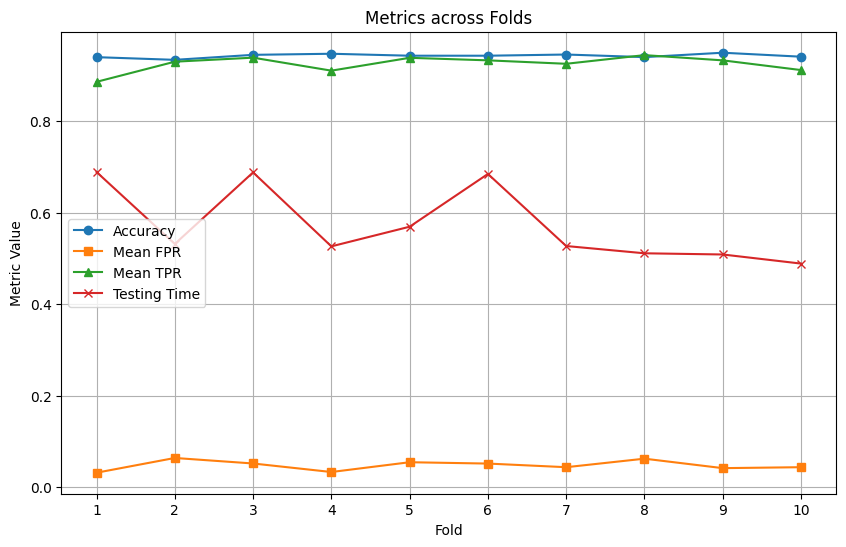

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.plot(range(1, 11), accuracy_scores, marker='o', linestyle='-', label='Accuracy')

# Plot mean FPR
plt.plot(range(1, 11), mean_fpr_values, marker='s', linestyle='-', label='Mean FPR')

# Plot mean TPR
plt.plot(range(1, 11), mean_tpr_values, marker='^', linestyle='-', label='Mean TPR')

# Plot testing time
plt.plot(range(1, 11), testing_times, marker='x', linestyle='-', label='Testing Time')

plt.title('Metrics across Folds')
plt.xlabel('Fold')
plt.ylabel('Metric Value')
plt.xticks(range(1, 11))
plt.grid(True)
plt.legend()
plt.show()

In [29]:
testing_time_reciprocal = 1 / average_testing_time
if average_memory_usage==0:
    average_memory_usage=0.01
memory_usage_reciprocal = 1 / average_memory_usage

    # Store metrics in the dictionary
model_metrics['feed_forward'] = {
'accuracy': average_accuracy,
'fpr': average_mean_fpr,
'tpr': average_mean_tpr,
'testing_time': testing_time_reciprocal,
'memory_usage': memory_usage_reciprocal}


In [30]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
import numpy as np
import time
from memory_profiler import profile

all_fpr = []
all_tpr = []
all_roc_auc = []
all_precision = []
all_recall = []
all_average_precision = []

# Perform 10-fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []
mean_fpr_values = []
mean_tpr_values = []
testing_times = []
memory_usages = []
for train_index, test_index in skf.split(selected_columns, y):
    X_train, X_test = selected_columns[train_index], selected_columns[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the neural network model
    model = create_dnn_model()

    # Measure training time
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)

    # Measure testing time
    testing_start_time = time.time()
    memory_before = measure_memory()
    y_pred = model.predict(X_test)
    memory_after = measure_memory()
    testing_time = time.time() - testing_start_time + 1
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    average_precision = average_precision_score(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    # Append metrics to lists
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_roc_auc.append(roc_auc)
    all_precision.append(precision)
    all_recall.append(recall)
    all_average_precision.append(average_precision)
    
    


     # Set a threshold
    threshold = 0.5

    # Calculate metrics
    y_pred_binary = (y_pred > threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_binary)
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    TN, FP, FN, TP = conf_matrix.ravel()

    fpr = FP / (FP + TN)
    tpr = TP / (TP + FN)

    # Take mean values of FPR and TPR for each fold
    mean_fpr_values.append(fpr)
    mean_tpr_values.append(tpr)

    memory_usage = memory_after - memory_before

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    testing_times.append(testing_time)
    memory_usages.append(memory_usage)

# Calculate average metrics
average_accuracy = np.mean(accuracy_scores)
average_mean_fpr = np.mean(mean_fpr_values)
average_mean_tpr = np.mean(mean_tpr_values)
average_testing_time = np.mean(testing_times)
average_memory_usage = np.mean(memory_usages)
average_precision = []
average_recall = []
average_fpr = []
average_tpr = []
average_roc_auc = np.mean(all_roc_auc)
max_columns = max(len(precision_array) for precision_array in all_precision)

# Iterate over the arrays in all_precision to calculate the mean for each column
for col_idx in range(max_columns):
    # List comprehension to collect valid values for the current column index
    col_values_precision = [precision_array[col_idx] for precision_array in all_precision if col_idx < len(precision_array)]
    
    # Check if any valid values exist for the current column index
    if col_values_precision:
        col_mean_precision = np.mean(col_values_precision)
        average_precision.append(col_mean_precision)

# Convert the list to a numpy array for precision
average_precision = np.array(average_precision)

# Repeat the same process for all_recall

# Determine the maximum number of columns for recall arrays
max_columns_recall = max(len(recall_array) for recall_array in all_recall)

# Iterate over the arrays in all_recall to calculate the mean for each column
for col_idx in range(max_columns_recall):
    # List comprehension to collect valid values for the current column index
    col_values_recall = [recall_array[col_idx] for recall_array in all_recall if col_idx < len(recall_array)]
    
    # Check if any valid values exist for the current column index
    if col_values_recall:
        col_mean_recall = np.mean(col_values_recall)
        average_recall.append(col_mean_recall)

# Convert the list to a numpy array for recall
average_recall = np.array(average_recall)

# Print the average precision and recall values across columns
print(f'Average Precision across columns: {average_precision}')
print(f'Average Recall across columns: {average_recall}')

max_columns_fpr = max(len(fpr_array) for fpr_array in all_fpr)

# Iterate over the arrays in all_fpr to calculate the mean for each column of FPR
for col_idx in range(max_columns_fpr):
    # List comprehension to collect valid values for the current column index
    col_values_fpr = [fpr_array[col_idx] for fpr_array in all_fpr if col_idx < len(fpr_array)]
    
    # Check if any valid values exist for the current column index
    if col_values_fpr:
        col_mean_fpr = np.mean(col_values_fpr)
        average_fpr.append(col_mean_fpr)

# Convert the list to a numpy array for FPR
average_fpr = np.array(average_fpr)

# Determine the maximum number of columns for TPR arrays
max_columns_tpr = max(len(tpr_array) for tpr_array in all_tpr)

# Iterate over the arrays in all_tpr to calculate the mean for each column of TPR
for col_idx in range(max_columns_tpr):
    # List comprehension to collect valid values for the current column index
    col_values_tpr = [tpr_array[col_idx] for tpr_array in all_tpr if col_idx < len(tpr_array)]
    
    # Check if any valid values exist for the current column index
    if col_values_tpr:
        col_mean_tpr = np.mean(col_values_tpr)
        average_tpr.append(col_mean_tpr)

# Convert the list to a numpy array for TPR
average_tpr = np.array(average_tpr)

# Print the average FPR and TPR values across columns
print(f'Average FPR across columns: {average_fpr}')
print(f'Average TPR across columns: {average_tpr}')
average_average_precision = np.mean(all_average_precision)

# Store the average metrics in the respective dictionaries
roc_curves['dnn'] = {'fpr': average_fpr, 'tpr': average_tpr, 'roc_auc': average_roc_auc}
precision_curves['dnn'] = {'precision': average_precision, 'recall': average_recall,
                            'average_precision': average_average_precision}
print(f'Average Accuracy: {average_accuracy}')
print(f'Average Mean FPR: {average_mean_fpr}')
print(f'Average Mean TPR: {average_mean_tpr}')
print(f'Average Testing Time: {average_testing_time} seconds')
print(f'Average Memory Usage: {average_memory_usage} MiB')
testing_time_reciprocal = 1 / average_testing_time
if average_memory_usage==0:
    average_memory_usage=0.01
memory_usage_reciprocal = 1 / average_memory_usage

    # Store metrics in the dictionary
model_metrics['dnn'] = {
'accuracy': average_accuracy,
'fpr': average_mean_fpr,
'tpr': average_mean_tpr,
'testing_time': testing_time_reciprocal,
'memory_usage': memory_usage_reciprocal}


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Average Precision across columns: [0.34571954 0.34575854 0.34579755 ... 1.         1.         1.        ]

Average Recall across columns: [1.         1.         1.         ... 0.01468189 0.01141925 0.        ]

Average FPR across columns: [0.         0.         0.         ... 0.98706897 0.98741379 1.        ]

Average TPR across columns: [0.         0.02806204 0.03125968 ... 1.         1.         1.        ]

Average Accuracy: 0.9391744791507591

Average Mean FPR: 0.04556896551724138

Average Mean TPR: 0.9103015282457119

Average Testing Time: 1.540321159362793 seconds

Average Memory Usage: 136.4 MiB


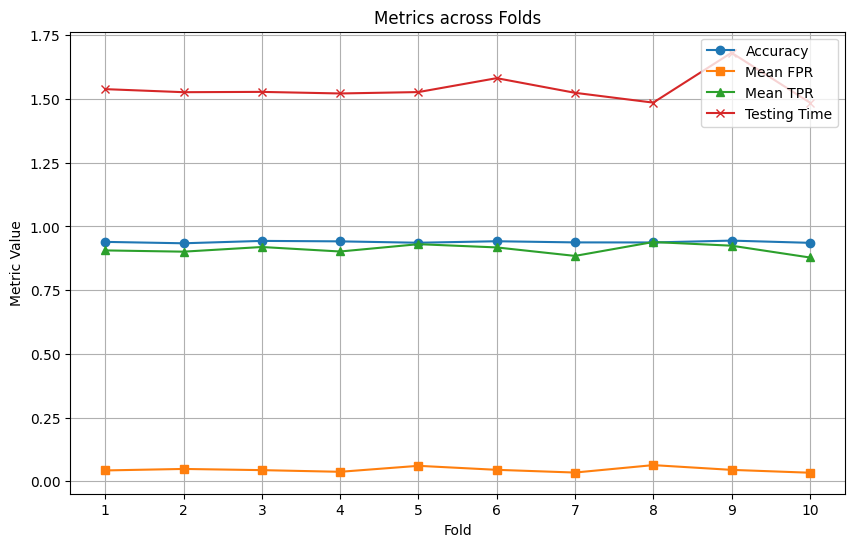

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.plot(range(1, 11), accuracy_scores, marker='o', linestyle='-', label='Accuracy')

# Plot mean FPR
plt.plot(range(1, 11), mean_fpr_values, marker='s', linestyle='-', label='Mean FPR')

# Plot mean TPR
plt.plot(range(1, 11), mean_tpr_values, marker='^', linestyle='-', label='Mean TPR')

# Plot testing time
plt.plot(range(1, 11), testing_times, marker='x', linestyle='-', label='Testing Time')

plt.title('Metrics across Folds')
plt.xlabel('Fold')
plt.ylabel('Metric Value')
plt.xticks(range(1, 11))
plt.grid(True)
plt.legend()
plt.show()

In [32]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
import numpy as np
import time
from memory_profiler import profile

all_fpr = []
all_tpr = []
all_roc_auc = []
all_precision = []
all_recall = []
all_average_precision = []

# Perform 10-fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []
mean_fpr_values = []
mean_tpr_values = []
testing_times = []
memory_usages = []


for train_index, test_index in skf.split(selected_columns, y):
    X_train, X_test = selected_columns[train_index], selected_columns[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Create the wide and deep model
    model = build_wide_deep_model(X_train.shape[1])
    start_time = time.time()
    # Train the model
    
    model.fit([X_train, X_train], y_train, epochs=10, batch_size=64, verbose=0)
    
    testing_start = time.time()
    memory_before = measure_memory()
    # Measure testing time
    y_pred_prob = model.predict([X_test, X_test])
    memory_after = measure_memory()
    testing_time = time.time() - testing_start
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    roc_auc = auc(fpr, tpr)
    average_precision = average_precision_score(y_test, y_pred_prob)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    # Append metrics to lists
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_roc_auc.append(roc_auc)
    all_precision.append(precision)
    all_recall.append(recall)
    all_average_precision.append(average_precision)
    


    # Set a threshold
    threshold = 0.5

    # Calculate metrics
    y_pred_binary = (y_pred_prob > threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_binary)
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    TN, FP, FN, TP = conf_matrix.ravel()

    fpr = FP / (FP + TN)
    tpr = TP / (TP + FN)

    # Take mean values of FPR and TPR for each fold
    mean_fpr_values.append(fpr)
    mean_tpr_values.append(tpr)
    memory_usage = memory_after - memory_before

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    testing_times.append(testing_time)
    memory_usages.append(memory_usage)

# Calculate average metrics

average_accuracy = np.mean(accuracy_scores)
average_mean_fpr = np.mean(mean_fpr_values)
average_mean_tpr = np.mean(mean_tpr_values)
average_testing_time = np.mean(testing_times)
average_memory_usage = np.mean(memory_usages)

print(f'Average Accuracy: {average_accuracy}')
print(f'Average Mean FPR: {average_mean_fpr}')
print(f'Average Mean TPR: {average_mean_tpr}')
print(f'Average Testing Time: {average_testing_time} seconds')
print(f'Average Memory Usage: {average_memory_usage} MiB')
average_precision = []
average_recall = []
average_fpr = []
average_tpr = []
average_roc_auc = np.mean(all_roc_auc)
max_columns = max(len(precision_array) for precision_array in all_precision)

# Iterate over the arrays in all_precision to calculate the mean for each column
for col_idx in range(max_columns):
    # List comprehension to collect valid values for the current column index
    col_values_precision = [precision_array[col_idx] for precision_array in all_precision if col_idx < len(precision_array)]
    
    # Check if any valid values exist for the current column index
    if col_values_precision:
        col_mean_precision = np.mean(col_values_precision)
        average_precision.append(col_mean_precision)

# Convert the list to a numpy array for precision
average_precision = np.array(average_precision)

# Repeat the same process for all_recall

# Determine the maximum number of columns for recall arrays
max_columns_recall = max(len(recall_array) for recall_array in all_recall)

# Iterate over the arrays in all_recall to calculate the mean for each column
for col_idx in range(max_columns_recall):
    # List comprehension to collect valid values for the current column index
    col_values_recall = [recall_array[col_idx] for recall_array in all_recall if col_idx < len(recall_array)]
    
    # Check if any valid values exist for the current column index
    if col_values_recall:
        col_mean_recall = np.mean(col_values_recall)
        average_recall.append(col_mean_recall)

# Convert the list to a numpy array for recall
average_recall = np.array(average_recall)

# Print the average precision and recall values across columns
print(f'Average Precision across columns: {average_precision}')
print(f'Average Recall across columns: {average_recall}')


max_columns_fpr = max(len(fpr_array) for fpr_array in all_fpr)

# Iterate over the arrays in all_fpr to calculate the mean for each column of FPR
for col_idx in range(max_columns_fpr):
    # List comprehension to collect valid values for the current column index
    col_values_fpr = [fpr_array[col_idx] for fpr_array in all_fpr if col_idx < len(fpr_array)]
    
    # Check if any valid values exist for the current column index
    if col_values_fpr:
        col_mean_fpr = np.mean(col_values_fpr)
        average_fpr.append(col_mean_fpr)

# Convert the list to a numpy array for FPR
average_fpr = np.array(average_fpr)

# Determine the maximum number of columns for TPR arrays
max_columns_tpr = max(len(tpr_array) for tpr_array in all_tpr)

# Iterate over the arrays in all_tpr to calculate the mean for each column of TPR
for col_idx in range(max_columns_tpr):
    # List comprehension to collect valid values for the current column index
    col_values_tpr = [tpr_array[col_idx] for tpr_array in all_tpr if col_idx < len(tpr_array)]
    
    # Check if any valid values exist for the current column index
    if col_values_tpr:
        col_mean_tpr = np.mean(col_values_tpr)
        average_tpr.append(col_mean_tpr)

# Convert the list to a numpy array for TPR
average_tpr = np.array(average_tpr)

# Print the average FPR and TPR values across columns
print(f'Average FPR across columns: {average_fpr}')
print(f'Average TPR across columns: {average_tpr}')
average_average_precision = np.mean(all_average_precision)

# Store the average metrics in the respective dictionaries
roc_curves['wide_and_deep'] = {'fpr': average_fpr, 'tpr': average_tpr, 'roc_auc': average_roc_auc}
precision_curves['wide_and_deep'] = {'precision': average_precision, 'recall': average_recall,
                            'average_precision': average_average_precision}
testing_time_reciprocal = 1 / average_testing_time
if average_memory_usage==0:
    average_memory_usage=0.01
memory_usage_reciprocal = 1 / average_memory_usage

# Store metrics in the dictionary
model_metrics['wide_and_deep'] = {
    'accuracy': average_accuracy,
    'fpr': average_mean_fpr,
    'tpr': average_mean_tpr,
    'testing_time': testing_time_reciprocal,
    'memory_usage': memory_usage_reciprocal
}


278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Average Accuracy: 0.9381704712280682

Average Mean FPR: 0.049413793103448275

Average Mean TPR: 0.9146724259835844

Average Testing Time: 0.7307114601135254 seconds

Average Memory Usage: -1.2 MiB

Average Precision across columns: [0.34571954 0.34575854 0.34579755 ... 1.         1.         1.        ]

Average Recall across columns: [1.         1.         1.         ... 0.01435563 0.01272431 0.        ]

Average FPR across columns: [0.         0.         0.         ... 0.95775862 0.95844828 1.        ]

Average TPR across columns: [0.         0.03341325 0.03732871 ... 1.  

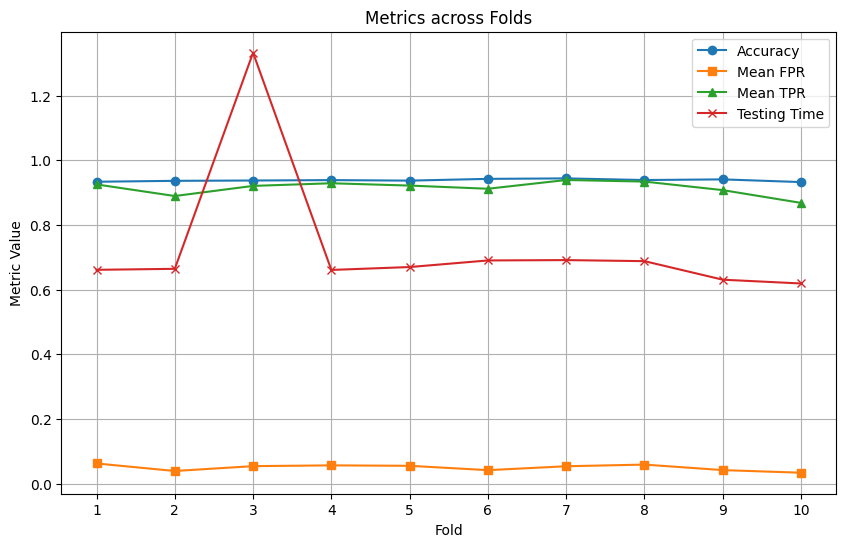

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.plot(range(1, 11), accuracy_scores, marker='o', linestyle='-', label='Accuracy')

# Plot mean FPR
plt.plot(range(1, 11), mean_fpr_values, marker='s', linestyle='-', label='Mean FPR')

# Plot mean TPR
plt.plot(range(1, 11), mean_tpr_values, marker='^', linestyle='-', label='Mean TPR')

# Plot testing time
plt.plot(range(1, 11), testing_times, marker='x', linestyle='-', label='Testing Time')

plt.title('Metrics across Folds')
plt.xlabel('Fold')
plt.ylabel('Metric Value')
plt.xticks(range(1, 11))
plt.grid(True)
plt.legend()
plt.show()

In [34]:
from sklearn.model_selection import StratifiedKFold
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np
import time
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, roc_auc_score
import torch


all_fpr = []
all_tpr = []
all_roc_auc = []
all_precision = []
all_recall = []
all_average_precision = []

# Perform 10-fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []
mean_fpr_values = []
mean_tpr_values = []
testing_times = []
memory_usages = []


for fold_index, (train_index, test_index) in enumerate(skf.split(selected_columns, y)):
    X_train, X_test = selected_columns[train_index], selected_columns[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create TabNet Pretrainer for pretraining
    pretrainer = TabNetPretrainer()
    pretrainer.fit(X_train)

    # Create TabNet model for classification
    tabnet_params = {"input_dim": X_train.shape[1], "output_dim": 1, "n_d": 8, "n_a": 8, "n_steps": 3}
    model_tabnet = TabNetClassifier(**tabnet_params)

    # Early stopping criteria
    max_epochs = 100
    patience = 10
    best_auc = 0
    counter = 0

    # Training loop with early stopping
    for epoch in range(max_epochs):
        model_tabnet.fit(
            X_train, y_train,
            eval_set=[(X_test, y_test)],
            eval_metric=['auc'],
            max_epochs=1,
            patience=patience,  # Set patience here
            batch_size=256,
            virtual_batch_size=128,
            num_workers=0,
            drop_last=False,
            from_unsupervised=pretrainer
        )

        # Evaluate model on validation set
        preds_proba = model_tabnet.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, preds_proba)

        print(f"epoch {epoch} | val_auc: {auc_score:.5f}")

        # Early stopping
        if auc_score > best_auc:
            best_auc = auc_score
            counter = 0
            # Save the best model
            torch.save(model_tabnet, "best_model.pt")
        else:
            counter += 1
            if counter >= patience:
                print("Early stopping")
                break

    # Load the best model
    best_model = torch.load("best_model.pt")
  
    # Calculate accuracy on test set
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)

    accuracy_scores.append(accuracy)

    # Measure testing time and memory usage
    testing_start_time = time.time()
    memory_before = measure_memory()
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]
    memory_after = measure_memory()
    testing_time = time.time() - testing_start_time + 1
    print(testing_time)
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    average_precision = average_precision_score(y_test, y_pred_prob)
    # Calculate Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    # Append metrics to lists
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_roc_auc.append(roc_auc)
    all_precision.append(precision)
    all_recall.append(recall)
    all_average_precision.append(average_precision)
    


    

    # Calculate memory usage
    memory_usage = memory_after - memory_before
    memory_usages.append(memory_usage)
    # Set a threshold
    threshold = 0.5

    # Calculate metrics
    y_pred_binary = (y_pred_prob > threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_binary)
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    TN, FP, FN, TP = conf_matrix.ravel()

    fpr = FP / (FP + TN)
    tpr = TP / (TP + FN)

    # Take mean values of FPR and TPR for each fold
    mean_fpr_values.append(fpr)
    mean_tpr_values.append(tpr)


    # Store testing time
    testing_times.append(testing_time)

# Calculate average accuracy
average_accuracy = np.mean(accuracy_scores)

# Calculate mean FPR and TPR across folds
mean_fpr = np.mean(mean_fpr_values)
mean_tpr = np.mean(mean_tpr_values)

# Calculate average testing time and memory usage
average_testing_time = np.mean(testing_times)
average_memory_usage = np.mean(memory_usages)
average_precision = []
average_recall = []
average_fpr = []
average_tpr = []
print(f'Average Accuracy: {average_accuracy}')
print(f'Average Testing Time: {average_testing_time} seconds')
print(f'Average Memory Usage: {average_memory_usage} MiB')

print(f'Average Accuracy: {average_accuracy}')
print(f'Average Mean FPR: {mean_fpr}')
print(f'Average Mean TPR: {mean_tpr}')
max_columns = max(len(precision_array) for precision_array in all_precision)

# Iterate over the arrays in all_precision to calculate the mean for each column
for col_idx in range(max_columns):
    # List comprehension to collect valid values for the current column index
    col_values_precision = [precision_array[col_idx] for precision_array in all_precision if col_idx < len(precision_array)]
    
    # Check if any valid values exist for the current column index
    if col_values_precision:
        col_mean_precision = np.mean(col_values_precision)
        average_precision.append(col_mean_precision)

# Convert the list to a numpy array for precision
average_precision = np.array(average_precision)

# Repeat the same process for all_recall

# Determine the maximum number of columns for recall arrays
max_columns_recall = max(len(recall_array) for recall_array in all_recall)

# Iterate over the arrays in all_recall to calculate the mean for each column
for col_idx in range(max_columns_recall):
    # List comprehension to collect valid values for the current column index
    col_values_recall = [recall_array[col_idx] for recall_array in all_recall if col_idx < len(recall_array)]
    
    # Check if any valid values exist for the current column index
    if col_values_recall:
        col_mean_recall = np.mean(col_values_recall)
        average_recall.append(col_mean_recall)

# Convert the list to a numpy array for recall
average_recall = np.array(average_recall)

# Print the average precision and recall values across columns
print(f'Average Precision across columns: {average_precision}')
print(f'Average Recall across columns: {average_recall}')

max_columns_fpr = max(len(fpr_array) for fpr_array in all_fpr)

# Iterate over the arrays in all_fpr to calculate the mean for each column of FPR
for col_idx in range(max_columns_fpr):
    # List comprehension to collect valid values for the current column index
    col_values_fpr = [fpr_array[col_idx] for fpr_array in all_fpr if col_idx < len(fpr_array)]
    
    # Check if any valid values exist for the current column index
    if col_values_fpr:
        col_mean_fpr = np.mean(col_values_fpr)
        average_fpr.append(col_mean_fpr)

# Convert the list to a numpy array for FPR
average_fpr = np.array(average_fpr)

# Determine the maximum number of columns for TPR arrays
max_columns_tpr = max(len(tpr_array) for tpr_array in all_tpr)

# Iterate over the arrays in all_tpr to calculate the mean for each column of TPR
for col_idx in range(max_columns_tpr):
    # List comprehension to collect valid values for the current column index
    col_values_tpr = [tpr_array[col_idx] for tpr_array in all_tpr if col_idx < len(tpr_array)]
    
    # Check if any valid values exist for the current column index
    if col_values_tpr:
        col_mean_tpr = np.mean(col_values_tpr)
        average_tpr.append(col_mean_tpr)

# Convert the list to a numpy array for TPR
average_tpr = np.array(average_tpr)

# Print the average FPR and TPR values across columns
print(f'Average FPR across columns: {average_fpr}')
print(f'Average TPR across columns: {average_tpr}')
average_roc_auc = np.mean(all_roc_auc)

average_average_precision = np.mean(all_average_precision)

# Store the average metrics in the respective dictionaries
roc_curves['tabnet'] = {'fpr': average_fpr, 'tpr': average_tpr, 'roc_auc': average_roc_auc}
precision_curves['tabnet'] = {'precision': average_precision, 'recall': average_recall,
                            'average_precision': average_average_precision}

testing_time_reciprocal = 1 / average_testing_time
if average_memory_usage==0:
    average_memory_usage=0.01
memory_usage_reciprocal = 1 / average_memory_usage

# Store metrics in the dictionary
model_metrics['tabnet'] = {
    'accuracy': average_accuracy,
    'fpr': mean_fpr,
    'tpr': mean_tpr,
    'testing_time': testing_time_reciprocal,
    'memory_usage': memory_usage_reciprocal
}

for metrics in model_metrics.values():
    print(metrics)



/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.

  warnings.warn(wrn_msg)


epoch 0  | loss: 2191.28742|  0:00:05s

epoch 1  | loss: 3.27654 |  0:00:11s

epoch 2  | loss: 2.22914 |  0:00:16s

epoch 3  | loss: 1.95676 |  0:00:21s

epoch 4  | loss: 1.77365 |  0:00:27s

epoch 5  | loss: 1.29683 |  0:00:32s

epoch 6  | loss: 1.2712  |  0:00:38s

epoch 7  | loss: 1.61397 |  0:00:43s

epoch 8  | loss: 1.34102 |  0:00:48s

epoch 9  | loss: 1.21428 |  0:00:54s

epoch 10 | loss: 1.11278 |  0:00:59s

epoch 11 | loss: 1.08712 |  0:01:04s

epoch 12 | loss: 0.98764 |  0:01:11s

epoch 13 | loss: 0.90956 |  0:01:17s

epoch 14 | loss: 0.85555 |  0:01:22s

epoch 15 | loss: 0.84693 |  0:01:27s

epoch 16 | loss: 0.83976 |  0:01:33s

epoch 17 | loss: 0.82401 |  0:01:38s

epoch 18 | loss: 0.81125 |  0:01:44s

epoch 19 | loss: 0.81003 |  0:01:49s

epoch 20 | loss: 0.81488 |  0:01:55s

epoch 21 | loss: 0.81477 |  0:02:00s

epoch 22 | loss: 0.80296 |  0:02:05s

epoch 23 | loss: 0.8125  |  0:02:11s

epoch 24 | loss: 0.80749 |  0:02:16s

epoch 25 | loss: 0.79974 |  0:02:22s

epoch 26 |

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20499 | val_0_auc: 0.97961 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 0 | val_auc: 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20499 | val_0_auc: 0.97961 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 1 | val_auc: 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20499 | val_0_auc: 0.97961 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 2 | val_auc: 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20499 | val_0_auc: 0.97961 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 3 | val_auc: 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20499 | val_0_auc: 0.97961 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 4 | val_auc: 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20499 | val_0_auc: 0.97961 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 5 | val_auc: 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20499 | val_0_auc: 0.97961 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 6 | val_auc: 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20499 | val_0_auc: 0.97961 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 7 | val_auc: 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20499 | val_0_auc: 0.97961 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 8 | val_auc: 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20499 | val_0_auc: 0.97961 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 9 | val_auc: 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20499 | val_0_auc: 0.97961 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97961


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 10 | val_auc: 0.97961

Early stopping

1.5496180057525635


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.

  warnings.warn(wrn_msg)


epoch 0  | loss: 1791.24159|  0:00:05s

epoch 1  | loss: 3.18687 |  0:00:11s

epoch 2  | loss: 2.15532 |  0:00:16s

epoch 3  | loss: 2.52514 |  0:00:22s

epoch 4  | loss: 1.61165 |  0:00:28s

epoch 5  | loss: 2.13819 |  0:00:34s

epoch 6  | loss: 1.51218 |  0:00:39s

epoch 7  | loss: 1.59337 |  0:00:45s

epoch 8  | loss: 1.22282 |  0:00:51s

epoch 9  | loss: 1.34309 |  0:00:56s

epoch 10 | loss: 1.13593 |  0:01:02s

epoch 11 | loss: 1.11451 |  0:01:08s

epoch 12 | loss: 1.2315  |  0:01:14s

epoch 13 | loss: 1.13554 |  0:01:20s

epoch 14 | loss: 1.03606 |  0:01:25s

epoch 15 | loss: 0.96916 |  0:01:31s

epoch 16 | loss: 0.92005 |  0:01:39s

epoch 17 | loss: 0.88472 |  0:01:44s

epoch 18 | loss: 0.85085 |  0:01:50s

epoch 19 | loss: 0.85717 |  0:01:56s

epoch 20 | loss: 0.84228 |  0:02:01s

epoch 21 | loss: 0.83147 |  0:02:07s

epoch 22 | loss: 0.83589 |  0:02:13s

epoch 23 | loss: 0.82116 |  0:02:18s

epoch 24 | loss: 0.8112  |  0:02:24s

epoch 25 | loss: 0.82045 |  0:02:29s

epoch 26 |

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.24379 | val_0_auc: 0.97247 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 0 | val_auc: 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.24379 | val_0_auc: 0.97247 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 1 | val_auc: 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.24379 | val_0_auc: 0.97247 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 2 | val_auc: 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.24379 | val_0_auc: 0.97247 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 3 | val_auc: 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.24379 | val_0_auc: 0.97247 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 4 | val_auc: 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.24379 | val_0_auc: 0.97247 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 5 | val_auc: 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.24379 | val_0_auc: 0.97247 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 6 | val_auc: 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.24379 | val_0_auc: 0.97247 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 7 | val_auc: 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.24379 | val_0_auc: 0.97247 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 8 | val_auc: 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.24379 | val_0_auc: 0.97247 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 9 | val_auc: 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.24379 | val_0_auc: 0.97247 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97247


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 10 | val_auc: 0.97247

Early stopping

1.3909320831298828


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.

  warnings.warn(wrn_msg)


epoch 0  | loss: 2074.71012|  0:00:05s

epoch 1  | loss: 2.96462 |  0:00:11s

epoch 2  | loss: 2.15988 |  0:00:17s

epoch 3  | loss: 1.7571  |  0:00:23s

epoch 4  | loss: 1.34362 |  0:00:28s

epoch 5  | loss: 1.54579 |  0:00:34s

epoch 6  | loss: 1.16139 |  0:00:40s

epoch 7  | loss: 1.14367 |  0:00:46s

epoch 8  | loss: 1.18425 |  0:00:52s

epoch 9  | loss: 1.03028 |  0:00:57s

epoch 10 | loss: 1.02608 |  0:01:03s

epoch 11 | loss: 0.97987 |  0:01:09s

epoch 12 | loss: 0.9279  |  0:01:14s

epoch 13 | loss: 0.91235 |  0:01:20s

epoch 14 | loss: 0.88894 |  0:01:26s

epoch 15 | loss: 0.86698 |  0:01:31s

epoch 16 | loss: 0.85249 |  0:01:37s

epoch 17 | loss: 0.84992 |  0:01:43s

epoch 18 | loss: 0.82299 |  0:01:48s

epoch 19 | loss: 0.83668 |  0:01:56s

epoch 20 | loss: 0.82606 |  0:02:02s

epoch 21 | loss: 0.81838 |  0:02:08s

epoch 22 | loss: 0.81914 |  0:02:13s

epoch 23 | loss: 0.81791 |  0:02:19s

epoch 24 | loss: 0.82283 |  0:02:25s

epoch 25 | loss: 0.81689 |  0:02:31s

epoch 26 |

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2028  | val_0_auc: 0.97972 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 0 | val_auc: 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2028  | val_0_auc: 0.97972 |  0:00:10s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 1 | val_auc: 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2028  | val_0_auc: 0.97972 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 2 | val_auc: 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2028  | val_0_auc: 0.97972 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 3 | val_auc: 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2028  | val_0_auc: 0.97972 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 4 | val_auc: 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2028  | val_0_auc: 0.97972 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 5 | val_auc: 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2028  | val_0_auc: 0.97972 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 6 | val_auc: 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2028  | val_0_auc: 0.97972 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 7 | val_auc: 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2028  | val_0_auc: 0.97972 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 8 | val_auc: 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2028  | val_0_auc: 0.97972 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 9 | val_auc: 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2028  | val_0_auc: 0.97972 |  0:00:10s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97972


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 10 | val_auc: 0.97972

Early stopping

1.3938863277435303


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.

  warnings.warn(wrn_msg)


epoch 0  | loss: 2288.59689|  0:00:05s

epoch 1  | loss: 2.99068 |  0:00:11s

epoch 2  | loss: 1.81425 |  0:00:17s

epoch 3  | loss: 1.38497 |  0:00:22s

epoch 4  | loss: 1.33393 |  0:00:28s

epoch 5  | loss: 1.15982 |  0:00:34s

epoch 6  | loss: 1.0619  |  0:00:40s

epoch 7  | loss: 0.99844 |  0:00:45s

epoch 8  | loss: 0.97226 |  0:00:51s

epoch 9  | loss: 0.90694 |  0:00:59s

epoch 10 | loss: 0.89917 |  0:01:04s

epoch 11 | loss: 0.88882 |  0:01:10s

epoch 12 | loss: 0.87441 |  0:01:16s

epoch 13 | loss: 0.8515  |  0:01:21s

epoch 14 | loss: 0.84344 |  0:01:27s

epoch 15 | loss: 0.8372  |  0:01:33s

epoch 16 | loss: 0.84643 |  0:01:38s

epoch 17 | loss: 0.82644 |  0:01:44s

epoch 18 | loss: 0.82711 |  0:01:50s

epoch 19 | loss: 0.82405 |  0:01:55s

epoch 20 | loss: 0.8219  |  0:02:01s

epoch 21 | loss: 0.80099 |  0:02:09s

epoch 22 | loss: 0.81035 |  0:02:15s

epoch 23 | loss: 0.80939 |  0:02:21s

epoch 24 | loss: 0.80942 |  0:02:26s

epoch 25 | loss: 0.7967  |  0:02:32s

epoch 26 |

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.27844 | val_0_auc: 0.95186 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 0 | val_auc: 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.27844 | val_0_auc: 0.95186 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 1 | val_auc: 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.27844 | val_0_auc: 0.95186 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 2 | val_auc: 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.27844 | val_0_auc: 0.95186 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 3 | val_auc: 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.27844 | val_0_auc: 0.95186 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 4 | val_auc: 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.27844 | val_0_auc: 0.95186 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 5 | val_auc: 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.27844 | val_0_auc: 0.95186 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 6 | val_auc: 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.27844 | val_0_auc: 0.95186 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 7 | val_auc: 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.27844 | val_0_auc: 0.95186 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 8 | val_auc: 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.27844 | val_0_auc: 0.95186 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 9 | val_auc: 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.27844 | val_0_auc: 0.95186 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.95186


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 10 | val_auc: 0.95186

Early stopping

1.3891384601593018


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.

  warnings.warn(wrn_msg)


epoch 0  | loss: 2080.77953|  0:00:06s

epoch 1  | loss: 3.30281 |  0:00:12s

epoch 2  | loss: 2.09252 |  0:00:17s

epoch 3  | loss: 1.6807  |  0:00:23s

epoch 4  | loss: 2.28437 |  0:00:29s

epoch 5  | loss: 1.74544 |  0:00:35s

epoch 6  | loss: 1.32692 |  0:00:41s

epoch 7  | loss: 1.2704  |  0:00:46s

epoch 8  | loss: 1.20976 |  0:00:52s

epoch 9  | loss: 1.73888 |  0:00:58s

epoch 10 | loss: 1.18686 |  0:01:03s

epoch 11 | loss: 1.19058 |  0:01:10s

epoch 12 | loss: 1.1176  |  0:01:16s

epoch 13 | loss: 1.01842 |  0:01:21s

epoch 14 | loss: 0.98687 |  0:01:27s

epoch 15 | loss: 0.9691  |  0:01:33s

epoch 16 | loss: 0.93008 |  0:01:38s

epoch 17 | loss: 0.92662 |  0:01:44s

epoch 18 | loss: 0.88966 |  0:01:50s

epoch 19 | loss: 0.85831 |  0:01:56s

epoch 20 | loss: 0.85805 |  0:02:01s

epoch 21 | loss: 0.82714 |  0:02:07s

epoch 22 | loss: 0.81713 |  0:02:13s

epoch 23 | loss: 0.81852 |  0:02:19s

epoch 24 | loss: 0.81648 |  0:02:26s

epoch 25 | loss: 0.81009 |  0:02:31s

epoch 26 |

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20047 | val_0_auc: 0.98184 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 0 | val_auc: 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20047 | val_0_auc: 0.98184 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 1 | val_auc: 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20047 | val_0_auc: 0.98184 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 2 | val_auc: 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20047 | val_0_auc: 0.98184 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 3 | val_auc: 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20047 | val_0_auc: 0.98184 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 4 | val_auc: 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20047 | val_0_auc: 0.98184 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 5 | val_auc: 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20047 | val_0_auc: 0.98184 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 6 | val_auc: 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20047 | val_0_auc: 0.98184 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 7 | val_auc: 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20047 | val_0_auc: 0.98184 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 8 | val_auc: 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20047 | val_0_auc: 0.98184 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 9 | val_auc: 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20047 | val_0_auc: 0.98184 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98184


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 10 | val_auc: 0.98184

Early stopping

1.3936398029327393


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.

  warnings.warn(wrn_msg)


epoch 0  | loss: 2305.09227|  0:00:05s

epoch 1  | loss: 2.9193  |  0:00:11s

epoch 2  | loss: 2.78343 |  0:00:17s

epoch 3  | loss: 1.84772 |  0:00:23s

epoch 4  | loss: 1.64873 |  0:00:29s

epoch 5  | loss: 1.55668 |  0:00:35s

epoch 6  | loss: 1.22139 |  0:00:40s

epoch 7  | loss: 1.12214 |  0:00:46s

epoch 8  | loss: 1.08595 |  0:00:52s

epoch 9  | loss: 0.9869  |  0:00:58s

epoch 10 | loss: 0.9855  |  0:01:03s

epoch 11 | loss: 0.93475 |  0:01:09s

epoch 12 | loss: 0.88684 |  0:01:15s

epoch 13 | loss: 0.85627 |  0:01:21s

epoch 14 | loss: 0.85008 |  0:01:26s

epoch 15 | loss: 0.8357  |  0:01:34s

epoch 16 | loss: 0.83978 |  0:01:40s

epoch 17 | loss: 0.84001 |  0:01:46s

epoch 18 | loss: 0.82574 |  0:01:52s

epoch 19 | loss: 0.82903 |  0:01:58s

epoch 20 | loss: 0.81273 |  0:02:04s

epoch 21 | loss: 0.81389 |  0:02:09s

epoch 22 | loss: 0.81322 |  0:02:15s

epoch 23 | loss: 0.81213 |  0:02:21s

epoch 24 | loss: 0.8243  |  0:02:27s

epoch 25 | loss: 0.80497 |  0:02:33s

epoch 26 |

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22289 | val_0_auc: 0.97618 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 0 | val_auc: 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22289 | val_0_auc: 0.97618 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 1 | val_auc: 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22289 | val_0_auc: 0.97618 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 2 | val_auc: 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22289 | val_0_auc: 0.97618 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 3 | val_auc: 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22289 | val_0_auc: 0.97618 |  0:00:10s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 4 | val_auc: 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22289 | val_0_auc: 0.97618 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 5 | val_auc: 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22289 | val_0_auc: 0.97618 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 6 | val_auc: 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22289 | val_0_auc: 0.97618 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 7 | val_auc: 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22289 | val_0_auc: 0.97618 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 8 | val_auc: 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22289 | val_0_auc: 0.97618 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 9 | val_auc: 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22289 | val_0_auc: 0.97618 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97618


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 10 | val_auc: 0.97618

Early stopping

1.3957023620605469


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.

  warnings.warn(wrn_msg)


epoch 0  | loss: 1863.9335|  0:00:05s

epoch 1  | loss: 2.75837 |  0:00:11s

epoch 2  | loss: 2.21064 |  0:00:16s

epoch 3  | loss: 2.08383 |  0:00:22s

epoch 4  | loss: 1.79655 |  0:00:28s

epoch 5  | loss: 1.55134 |  0:00:34s

epoch 6  | loss: 1.38806 |  0:00:39s

epoch 7  | loss: 1.41397 |  0:00:45s

epoch 8  | loss: 1.25377 |  0:00:51s

epoch 9  | loss: 1.11183 |  0:00:57s

epoch 10 | loss: 1.09348 |  0:01:02s

epoch 11 | loss: 1.05809 |  0:01:08s

epoch 12 | loss: 1.0321  |  0:01:14s

epoch 13 | loss: 1.00493 |  0:01:19s

epoch 14 | loss: 0.96939 |  0:01:25s

epoch 15 | loss: 0.95062 |  0:01:31s

epoch 16 | loss: 0.92651 |  0:01:37s

epoch 17 | loss: 0.87926 |  0:01:43s

epoch 18 | loss: 0.86127 |  0:01:51s

epoch 19 | loss: 0.83534 |  0:01:57s

epoch 20 | loss: 0.83125 |  0:02:03s

epoch 21 | loss: 0.83296 |  0:02:08s

epoch 22 | loss: 0.83004 |  0:02:14s

epoch 23 | loss: 0.8277  |  0:02:19s

epoch 24 | loss: 0.81295 |  0:02:25s

epoch 25 | loss: 0.82565 |  0:02:31s

epoch 26 | 

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20456 | val_0_auc: 0.98194 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 0 | val_auc: 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20456 | val_0_auc: 0.98194 |  0:00:10s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 1 | val_auc: 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20456 | val_0_auc: 0.98194 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 2 | val_auc: 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20456 | val_0_auc: 0.98194 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 3 | val_auc: 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20456 | val_0_auc: 0.98194 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 4 | val_auc: 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20456 | val_0_auc: 0.98194 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 5 | val_auc: 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20456 | val_0_auc: 0.98194 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 6 | val_auc: 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20456 | val_0_auc: 0.98194 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 7 | val_auc: 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20456 | val_0_auc: 0.98194 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 8 | val_auc: 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20456 | val_0_auc: 0.98194 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 9 | val_auc: 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.20456 | val_0_auc: 0.98194 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.98194


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 10 | val_auc: 0.98194

Early stopping

1.3844523429870605


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.

  warnings.warn(wrn_msg)


epoch 0  | loss: 2140.34748|  0:00:06s

epoch 1  | loss: 2.68217 |  0:00:11s

epoch 2  | loss: 1.7814  |  0:00:17s

epoch 3  | loss: 2.21765 |  0:00:23s

epoch 4  | loss: 1.32002 |  0:00:28s

epoch 5  | loss: 1.37397 |  0:00:34s

epoch 6  | loss: 1.28697 |  0:00:40s

epoch 7  | loss: 1.13127 |  0:00:46s

epoch 8  | loss: 1.06263 |  0:00:51s

epoch 9  | loss: 1.06383 |  0:00:58s

epoch 10 | loss: 0.982   |  0:01:03s

epoch 11 | loss: 0.9176  |  0:01:09s

epoch 12 | loss: 0.89554 |  0:01:15s

epoch 13 | loss: 0.85795 |  0:01:21s

epoch 14 | loss: 0.8392  |  0:01:26s

epoch 15 | loss: 0.83141 |  0:01:32s

epoch 16 | loss: 0.82925 |  0:01:38s

epoch 17 | loss: 0.82078 |  0:01:43s

epoch 18 | loss: 0.81659 |  0:01:49s

epoch 19 | loss: 0.80903 |  0:01:55s

epoch 20 | loss: 0.82469 |  0:02:00s

epoch 21 | loss: 0.80619 |  0:02:08s

epoch 22 | loss: 0.80526 |  0:02:14s

epoch 23 | loss: 0.82307 |  0:02:19s

epoch 24 | loss: 0.80454 |  0:02:25s

epoch 25 | loss: 0.80523 |  0:02:31s

epoch 26 |

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.21318 | val_0_auc: 0.97591 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 0 | val_auc: 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.21318 | val_0_auc: 0.97591 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 1 | val_auc: 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.21318 | val_0_auc: 0.97591 |  0:00:10s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 2 | val_auc: 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.21318 | val_0_auc: 0.97591 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 3 | val_auc: 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.21318 | val_0_auc: 0.97591 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 4 | val_auc: 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.21318 | val_0_auc: 0.97591 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 5 | val_auc: 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.21318 | val_0_auc: 0.97591 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 6 | val_auc: 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.21318 | val_0_auc: 0.97591 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 7 | val_auc: 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.21318 | val_0_auc: 0.97591 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 8 | val_auc: 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.21318 | val_0_auc: 0.97591 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 9 | val_auc: 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.21318 | val_0_auc: 0.97591 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97591


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 10 | val_auc: 0.97591

Early stopping

1.4021110534667969


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.

  warnings.warn(wrn_msg)


epoch 0  | loss: 2124.47703|  0:00:05s

epoch 1  | loss: 2.55409 |  0:00:11s

epoch 2  | loss: 1.36661 |  0:00:17s

epoch 3  | loss: 1.12995 |  0:00:23s

epoch 4  | loss: 1.05944 |  0:00:28s

epoch 5  | loss: 0.99856 |  0:00:34s

epoch 6  | loss: 0.93861 |  0:00:40s

epoch 7  | loss: 0.90899 |  0:00:45s

epoch 8  | loss: 0.89935 |  0:00:51s

epoch 9  | loss: 0.87371 |  0:00:57s

epoch 10 | loss: 0.85393 |  0:01:03s

epoch 11 | loss: 0.84111 |  0:01:08s

epoch 12 | loss: 0.85295 |  0:01:16s

epoch 13 | loss: 0.82616 |  0:01:22s

epoch 14 | loss: 0.82986 |  0:01:28s

epoch 15 | loss: 0.80569 |  0:01:34s

epoch 16 | loss: 0.8153  |  0:01:40s

epoch 17 | loss: 0.8175  |  0:01:46s

epoch 18 | loss: 0.82097 |  0:01:51s

epoch 19 | loss: 0.8183  |  0:01:57s

epoch 20 | loss: 0.81778 |  0:02:03s

epoch 21 | loss: 0.80476 |  0:02:09s

epoch 22 | loss: 0.81332 |  0:02:14s

epoch 23 | loss: 0.8049  |  0:02:20s

epoch 24 | loss: 0.79145 |  0:02:28s

epoch 25 | loss: 0.81297 |  0:02:34s

epoch 26 |

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22622 | val_0_auc: 0.97729 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 0 | val_auc: 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22622 | val_0_auc: 0.97729 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 1 | val_auc: 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22622 | val_0_auc: 0.97729 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 2 | val_auc: 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22622 | val_0_auc: 0.97729 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 3 | val_auc: 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22622 | val_0_auc: 0.97729 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 4 | val_auc: 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22622 | val_0_auc: 0.97729 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 5 | val_auc: 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22622 | val_0_auc: 0.97729 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 6 | val_auc: 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22622 | val_0_auc: 0.97729 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 7 | val_auc: 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22622 | val_0_auc: 0.97729 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 8 | val_auc: 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22622 | val_0_auc: 0.97729 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 9 | val_auc: 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.22622 | val_0_auc: 0.97729 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97729


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 10 | val_auc: 0.97729

Early stopping

1.394859790802002


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.

  warnings.warn(wrn_msg)


epoch 0  | loss: 2084.38254|  0:00:05s

epoch 1  | loss: 3.22086 |  0:00:11s

epoch 2  | loss: 1.81594 |  0:00:17s

epoch 3  | loss: 1.76587 |  0:00:23s

epoch 4  | loss: 1.50476 |  0:00:28s

epoch 5  | loss: 1.49889 |  0:00:34s

epoch 6  | loss: 1.23392 |  0:00:40s

epoch 7  | loss: 1.26327 |  0:00:46s

epoch 8  | loss: 1.09799 |  0:00:51s

epoch 9  | loss: 1.04858 |  0:00:57s

epoch 10 | loss: 0.99932 |  0:01:03s

epoch 11 | loss: 0.96046 |  0:01:09s

epoch 12 | loss: 0.93714 |  0:01:15s

epoch 13 | loss: 0.91873 |  0:01:20s

epoch 14 | loss: 0.87578 |  0:01:26s

epoch 15 | loss: 0.85546 |  0:01:32s

epoch 16 | loss: 0.84055 |  0:01:38s

epoch 17 | loss: 0.8414  |  0:01:43s

epoch 18 | loss: 0.82684 |  0:01:49s

epoch 19 | loss: 0.82081 |  0:01:54s

epoch 20 | loss: 0.83191 |  0:02:00s

epoch 21 | loss: 0.81604 |  0:02:06s

epoch 22 | loss: 0.81619 |  0:02:12s

epoch 23 | loss: 0.82045 |  0:02:17s

epoch 24 | loss: 0.81869 |  0:02:23s

epoch 25 | loss: 0.8053  |  0:02:29s

epoch 26 |

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu

  warnings.warn(f"Device used : {self.device}")

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2176  | val_0_auc: 0.97105 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 0 | val_auc: 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2176  | val_0_auc: 0.97105 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 1 | val_auc: 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2176  | val_0_auc: 0.97105 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 2 | val_auc: 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2176  | val_0_auc: 0.97105 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 3 | val_auc: 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2176  | val_0_auc: 0.97105 |  0:00:10s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 4 | val_auc: 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2176  | val_0_auc: 0.97105 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 5 | val_auc: 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2176  | val_0_auc: 0.97105 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 6 | val_auc: 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2176  | val_0_auc: 0.97105 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 7 | val_auc: 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2176  | val_0_auc: 0.97105 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 8 | val_auc: 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2176  | val_0_auc: 0.97105 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 9 | val_auc: 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining

  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.2176  | val_0_auc: 0.97105 |  0:00:09s

Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_auc = 0.97105


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!

  warnings.warn(wrn_msg)


epoch 10 | val_auc: 0.97105

Early stopping

1.3907365798950195

Average Accuracy: 0.9138944323293037

Average Testing Time: 1.4085076808929444 seconds

Average Memory Usage: 0.0 MiB

Average Accuracy: 0.9138944323293037

Average Mean FPR: 0.08539655172413793

Average Mean TPR: 0.9125546684328667

Average Precision across columns: [0.34571954 0.34666197 0.34672178 ... 1.         1.         1.        ]

Average Recall across columns: [1.00000000e+00 9.99902121e-01 9.99902121e-01 ... 6.52528548e-04

 3.26264274e-04 0.00000000e+00]

Average FPR across columns: [0.         0.         0.         ... 0.99068966 0.99103448 1.        ]

Average TPR across columns: [0.         0.00117483 0.00965841 ... 1.         1.         1.        ]

{'accuracy': 0.942716639585764, 'fpr': 0.04789655172413793, 'tpr': 0.9249523168596852, 'testing_time': 1.7469807205452452, 'memory_usage': 0.006793478260869566}

{'accuracy': 0.9391744791507591, 'fpr': 0.04556896551724138, 'tpr': 0.9103015282457119, 'testing_tim

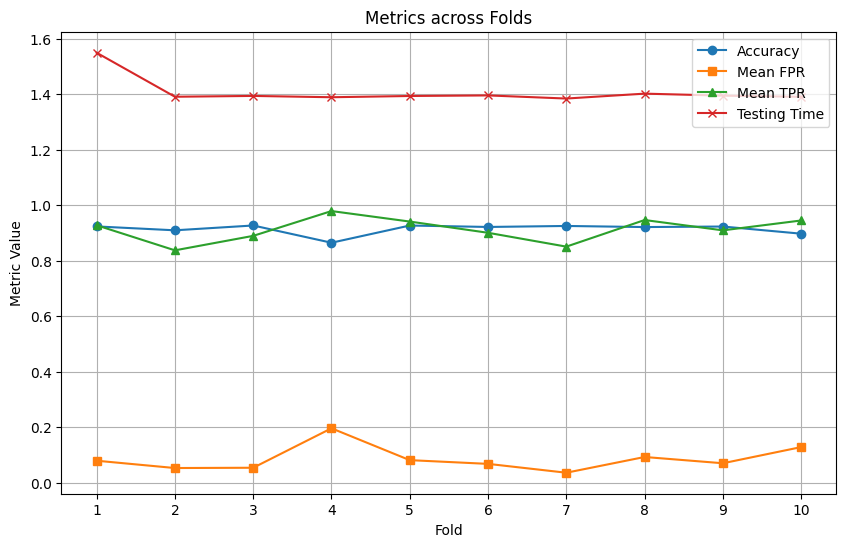

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.plot(range(1, 11), accuracy_scores, marker='o', linestyle='-', label='Accuracy')

# Plot mean FPR
plt.plot(range(1, 11), mean_fpr_values, marker='s', linestyle='-', label='Mean FPR')

# Plot mean TPR
plt.plot(range(1, 11), mean_tpr_values, marker='^', linestyle='-', label='Mean TPR')

# Plot testing time
plt.plot(range(1, 11), testing_times, marker='x', linestyle='-', label='Testing Time')

plt.title('Metrics across Folds')
plt.xlabel('Fold')
plt.ylabel('Metric Value')
plt.xticks(range(1, 11))
plt.grid(True)
plt.legend()
plt.show()

In [36]:
from sklearn.preprocessing import minmax_scale
all_testing_times = [metrics['testing_time'] for metrics in model_metrics.values()]
all_memory_usages = [metrics['memory_usage'] for metrics in model_metrics.values()]

scaled_testing_times = minmax_scale(all_testing_times)
scaled_memory_usages = minmax_scale(all_memory_usages)

# Update the metrics dictionary with scaled values
for idx, model_name in enumerate(model_metrics.keys()):
    model_metrics[model_name]['testing_time_scaled'] = scaled_testing_times[idx]
    model_metrics[model_name]['memory_usage_scaled'] = scaled_memory_usages[idx]


In [37]:
for metrics in model_metrics.values():
    print(metrics)

{'accuracy': 0.942716639585764, 'fpr': 0.04789655172413793, 'tpr': 0.9249523168596852, 'testing_time': 1.7469807205452452, 'memory_usage': 0.006793478260869566, 'testing_time_scaled': 1.0, 'memory_usage_scaled': 0.008331836148041682}

{'accuracy': 0.9391744791507591, 'fpr': 0.04556896551724138, 'tpr': 0.9103015282457119, 'testing_time': 0.6492152587280464, 'memory_usage': 0.007331378299120234, 'testing_time_scaled': 0.0, 'memory_usage_scaled': 0.008337170693875573}

{'accuracy': 0.9381704712280682, 'fpr': 0.049413793103448275, 'tpr': 0.9146724259835844, 'testing_time': 1.3685292411379961, 'memory_usage': -0.8333333333333334, 'testing_time_scaled': 0.6552528818125003, 'memory_usage_scaled': 0.0}

{'accuracy': 0.9138944323293037, 'fpr': 0.08539655172413793, 'tpr': 0.9125546684328667, 'testing_time': 0.7099712792237207, 'memory_usage': 100.0, 'testing_time_scaled': 0.05534517400019223, 'memory_usage_scaled': 1.0}


In [38]:
anti_phishing_scores = {}

for model_name, metrics in model_metrics.items():
    # Extract metrics
    average_accuracy = metrics['accuracy']
    average_fpr = metrics['fpr']
    average_tpr = metrics['tpr']
    testing_time_scaled = metrics['testing_time_scaled']
    memory_usage_scaled = metrics['memory_usage_scaled']

    # Calculate anti-phishing score using the provided formula
    #anti_phishing_score = 0.3 * average_accuracy + 0.25 * (1 - average_fpr) + 0.25 * average_tpr + 0.1 * testing_time_scaled + 0.1 * memory_usage_scaled
    anti_phishing_score = 0.3 * average_accuracy + 0.25 * (1 - average_fpr) + 0.25 * average_tpr + 0.2 * testing_time_scaled

    # Store the anti-phishing score for the model
    anti_phishing_scores[model_name] = anti_phishing_score

# Print the anti-phishing scores for each model
print("\nAnti-Phishing Scores:")
for model_name, score in anti_phishing_scores.items():
    print(f"{model_name}: {score:.4f}")



Anti-Phishing Scores:

feed_forward: 0.9521

dnn: 0.7479

wide_and_deep: 0.8788

tabnet: 0.7420


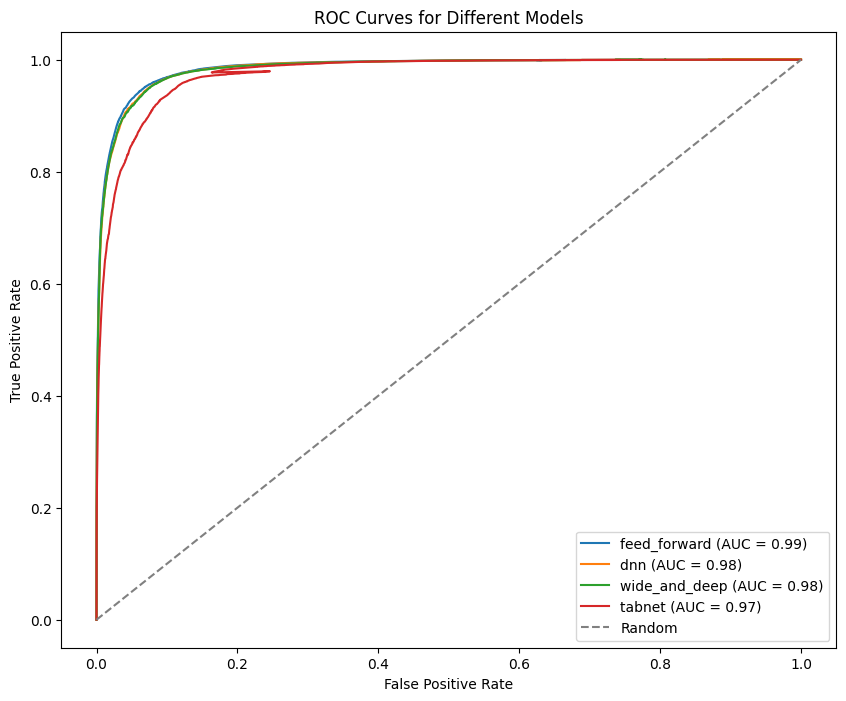

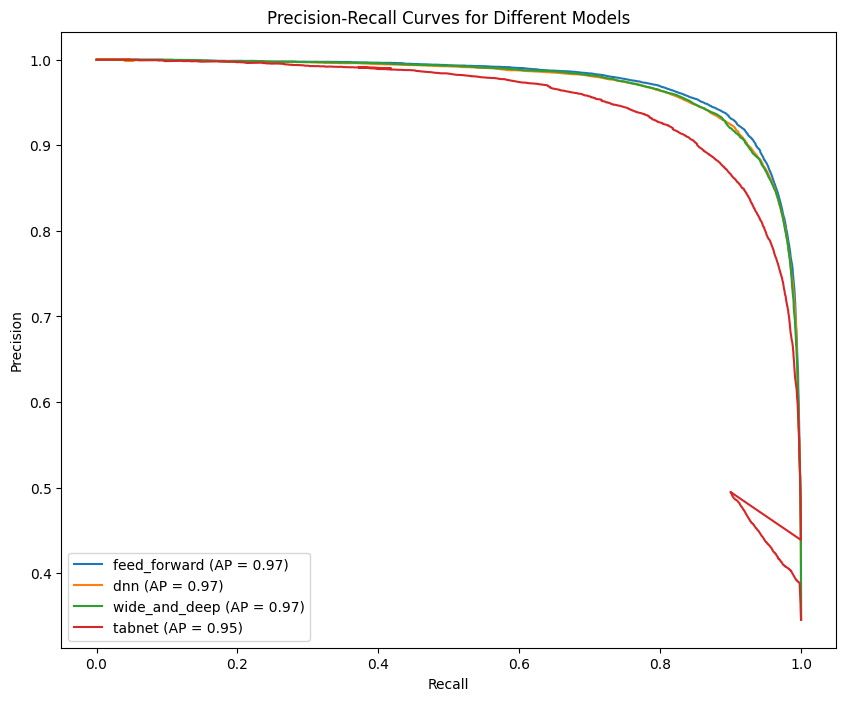

In [39]:
model_names = ['feed_forward', 'dnn', 'wide_and_deep', 'tabnet']
# Plot ROC curves
plt.figure(figsize=(10, 8))
for model_name in model_names:
    plt.plot(roc_curves[model_name]['fpr'], roc_curves[model_name]['tpr'],
             label=f'{model_name} (AUC = {roc_curves[model_name]["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(10, 8))
for model_name in model_names:
    plt.plot(precision_curves[model_name]['recall'], precision_curves[model_name]['precision'],
             label=f'{model_name} (AP = {precision_curves[model_name]["average_precision"]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Different Models')
plt.legend()
plt.show()

In [40]:
best_model = max(anti_phishing_scores, key=anti_phishing_scores.get)
print(best_model)
print(selected_columns)

feed_forward

[[0.02272727 0.26291212 0.00504686 ... 0.         0.02214938 0.        ]

 [0.06818182 0.03251941 0.05263158 ... 0.         0.00664481 0.        ]

 [0.02272727 0.26291212 0.0026436  ... 0.         0.02214938 0.        ]

 ...

 [0.11363636 0.10369078 0.01586157 ... 0.02857143 0.03154071 0.        ]

 [0.02272727 0.26291212 0.00576784 ... 0.         0.02214938 0.        ]

 [0.         0.01682232 0.00288392 ... 0.         0.00283512 0.        ]]


from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
def train_tabnet_model(X_train, y_train, X_test, y_test):
    # Create TabNet Pretrainer for pretraining
    pretrainer = TabNetPretrainer()
    pretrainer.fit(X_train)

    # Create TabNet model for classification
    tabnet_params = {"input_dim": X_train.shape[1], "output_dim": 1, "n_d": 8, "n_a": 8, "n_steps": 3}
    model_tabnet = TabNetClassifier(**tabnet_params)

    # Fine-tune TabNet on the classification task
    model_tabnet.fit(X_train, y_train, eval_set=[(X_test, y_test)], patience=10, max_epochs=100)

    y_pred_prob = model_tabnet.predict_proba(X_test)[:, 1]
    threshold = 0.5
    y_pred = (y_pred_prob > threshold).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy,model_tabnet

from sklearn.model_selection import train_test_split
import numpy as np
import joblib
#best_model='feed_forward'
# Function to choose and train the model
def train_and_test_model(model_name, X_train, y_train, X_test, y_test):
    if model_name == 'feed_forward':
        model = create_feedforward_neural_network()
    elif model_name == 'dnn':
        model = create_dnn_model(X_train.shape[1])
    elif model_name == 'wide_and_deep':
        model = build_wide_deep_model(X_train.shape[1])
    elif model_name == 'tabnet':
        accuracy,model = train_tabnet_model(X_train, y_train, X_test, y_test)
        return accuracy,model
    else:
        raise ValueError(f"Unknown model name: {model_name}")

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=64)

    y_pred = model.predict(X_test)
    threshold = 0.5

    # Calculate metrics
    y_pred_binary = (y_pred > threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_binary)

    # Save the trained model
    #model_filename = f"{model_name}_model.pkl"
    #joblib.dump(model, model_filename)

    return accuracy,model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_columns, y, test_size=0.3, random_state=42)

# Train and test the selected model
accuracy,model = train_and_test_model(best_model, X_train, y_train, X_test, y_test)

print(f"Accuracy of {best_model}: {accuracy:.4f}")


!pip install python-whois
!pip install requests
!pip install dnspython
!pip install tldextract



ds = pd.read_csv('/kaggle/input/phishing/dataset_full.csv')
V = ds.drop('phishing', axis=1)

import whois
import re
from urllib.parse import urlparse
import ssl
from datetime import datetime
import requests
import dns.resolver
import torch

def qty_slash_url(url):
    return url.count('/')

import urllib.parse


def length_url(url):
    return len(url)

def qty_dot_domain(url):
    domain = urlparse(url).netloc
    return domain.count('.')

def qty_vowels_domain(url):
    domain = urlparse(url).netloc
    return sum(1 for char in domain if char.lower() in 'aeiou')

def directory_length(url):
    path = urlparse(url).path
    return len(path.split('/'))

def file_length(url):
    path = urlparse(url).path
    filename = path.split('/')[-1]
    return len(filename)

import tldextract

def tld_present_params(url):
    """Check for presence of Top-Level Domains (TLD)."""
    extracted = tldextract.extract(url)
    return 1 if bool(extracted.suffix) else 0



def qty_mx_servers(url):
    """Return Number of Resolved MX Servers."""
    url = {'host': url.split('/')[2]}
    count = 0
    if count_ips(url):
        try:
            answers = resolver.query(url['host'], 'MX')
            return len(answers)
        except (dns.resolver.NoAnswer, dns.resolver.NXDOMAIN):
            split_host = url['host'].split('.')
            while len(split_host) > 0:
                split_host.pop(0)
                supposed_domain = '.'.join(split_host)
                try:
                    answers = resolver.query(supposed_domain, 'MX')
                    count = len(answers)
                    break
                except Exception:
                    count = 0
        except Exception:
            count = 0
    return count


def qty_dot_directory(url):
    path = urlparse(url).path
    return path.count('.')

def url_shortened(url, file_path):
    url = {'host': url.split('/')[2]}
    """Check if the domain is a shortener."""
    with open(file_path, 'r') as file:
        for line in file:
            with_www = "www." + line.strip()
            if line.strip() == url['host'].lower() or with_www == url['host'].lower():
                return 1
    return 0


def tls_ssl_certificate(url):
    """Check if the ssl certificate is valid."""
    try:
        requests.get(url, verify=True, timeout=3)
        return 1
    except Exception:
        return 0

import ipaddress

resolver = dns.resolver.Resolver()

def valid_ip(host):
    """Return if the domain has a valid IP format (IPv4 or IPv6)."""
    try:
        ipaddress.ip_address(host)
        return 1
    except Exception:
        return 0


def count_ips(url):
    """Return the number of resolved IPs (IPv4)."""
    if valid_ip(url['host']):
        return 1

    try:
        answers = resolver.query(url['host'], 'A')
        return len(answers)
    except Exception:
        return -1

def qty_nameservers(url):
    """Return number of NameServers (NS) resolved."""
    url = {'host': url.split('/')[2]}
    count = 0
    if count_ips(url):
        try:
            answers = resolver.query(url['host'], 'NS')
            return len(answers)
        except dns.resolver.NoAnswer:
            split_host = url['host'].split('.')
            while len(split_host) > 0:
                split_host.pop(0)
                supposed_domain = '.'.join(split_host)
                try:
                    answers = resolver.query(supposed_domain, 'NS')
                    count = len(answers)
                    break
                except Exception:
                    count = 0
        except dns.resolver.NXDOMAIN:
            count = 0
    return count

    
def time_domain_activation(url):
    """Return time (in days) of domain activation."""
    url = {'host': url.split('/')[2]}
    if url['host'].startswith("www."):
        url['host'] = url['host'][4:]

    try:
        result_whois =  whois.whois(url['host'].lower())
        if not result_whois:
            return -1
        creation_date = str(result_whois['creation_date'][0])
        formated_date = " ".join(creation_date.split()[:1])
        d1 = datetime.strptime(formated_date, "%Y-%m-%d")
        d2 = datetime.now()
        return abs((d2 - d1).days)
    except Exception:
        return -1

def qty_at_url(url):
    return url.count('@')

# Define a function to process a URL and extract all features

def extract_features(url):
    return [
        qty_slash_url(url),
        time_domain_activation(url),
        length_url(url),
        qty_dot_domain(url),
        qty_vowels_domain(url),
        directory_length(url),
        file_length(url),
        tld_present_params(url),
        qty_mx_servers(url),
        qty_dot_directory(url),
        url_shortened(url,'/kaggle/input/filess/shorteners.txt'),
        tls_ssl_certificate(url),
        qty_nameservers(url),
        qty_at_url(url)
    ]

# Define your machine learning model
# Example:
# model = load_model('your_model.h5')

# Define a function to predict using the model
def predict_with_model(features):
    #y_pred_prob = model.predict_proba(features)[:, 1]
    y_pred_prob = model.predict(features)
    threshold = 0.5
    y_pred = (y_pred_prob > threshold).astype(int)
    return y_pred


# Define a function to process a URL and predict using the model
import numpy as np

def process_url_and_predict(url):
    features = extract_features(url)
    min_values = V[columns_of_interest].min(axis=0)
    max_values = V[columns_of_interest].max(axis=0)
    
    # Replace -1 with NaN in a copy of V[columns_of_interest]
    v_copy = V[columns_of_interest].replace(-1, np.nan)
    
    # Calculate mean excluding NaN values for each column
    mean_values = v_copy.mean(axis=0)
    
    # Replace -1 with mean values
    for i, feature in enumerate(features):
        if feature == -1:
            features[i] = mean_values[i]
    
    scaler = MinMaxScaler()
    scaler.fit([min_values, max_values])  # Fit the scaler with min and max values
    scaled_example = scaler.transform([features])
    print(features)
    prediction = predict_with_model(scaled_example)
    print(prediction)
    return prediction



# Assuming you have a dataset with columns 'url' and 'result'
# Replace 'dataset.csv' with the path to your dataset file
dataset = pd.read_csv('/kaggle/input/test-result/phishing_dataset.csv')

# Define a function to calculate accuracy
def calculate_accuracy(predictions, actual):
    correct_predictions = (predictions == actual).sum()
    total_samples = len(actual)
    accuracy = correct_predictions / total_samples
    return accuracy

# Initialize variables to store predictions and actual results
predictions = []
actual_results = []

# Process each URL in the dataset and make predictions
for index, row in dataset.iterrows():
    if index==100:
        break
    url = row['url']
    result = row['result']
    prediction = process_url_and_predict(url)
    predictions.append(prediction)
    actual_results.append(result)
    print(result)

# Convert predictions and actual results to numpy arrays for easier comparison
predictions = np.array(predictions)
actual_results = np.array(actual_results)

# Calculate accuracy
accuracy = calculate_accuracy(predictions, actual_results)
print('Accuracy:', accuracy)



In [ ]:

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

import pandas as pd


In [ ]:

columns_of_interest  = top_features

    



    


In [ ]:
def calculate_accur(predictions, actual_results):
    # Initialize a variable to count the number of correct predictions
    correct_predictions = 0

    # Iterate through each prediction and actual result
    for pred, actual in zip(predictions, actual_results):
        # Check if the prediction matches the actual result
        if pred == actual:
            # If so, increment the count of correct predictions
            correct_predictions += 1

    # Calculate accuracy by dividing the number of correct predictions by the total number of predictions
    accuracy = (correct_predictions / len(predictions)) * 100
    return accuracy
def predict_with_model(model, features, actual_results):
    features = features.reshape((features.shape[0], features.shape[2]))
    #print(features[0])
    y_pred_prob = model.predict(features,verbose=0)
    
    threshold = 0.5
    y_pred = (y_pred_prob > threshold).astype(int)

    accuracy = calculate_accur(y_pred, actual_results)
    return accuracy


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l1, l2

def create_feedforward_neural_network(input_dim, num_hidden_layers, num_neurons, learning_rate):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=input_dim, activation='relu', kernel_regularizer=l1(0.0), kernel_initializer='glorot_uniform'))
    for _ in range(num_hidden_layers):
        model.add(Dense(num_neurons, activation='relu', kernel_regularizer=l2(0.0), kernel_initializer='glorot_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Define optimizer with custom learning rate
    optimizer = Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def preprocess_data(csv_path, columns_of_interest, test_size):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_path)

    # Replace -1 with mean values
    for col in df.columns:
        if -1 in df[col].unique():
            mean_value = int(df[col][df[col] != -1].mean())
            df[col] = df[col].replace(-1, mean_value)

    target_column = 'phishing'
    x = df.drop(target_column, axis=1)
    scaler = MinMaxScaler()

    # Apply Min-Max scaling to each column
    for col in x.columns:
        column_values = x[col].values.reshape(-1, 1)
        x[col] = scaler.fit_transform(column_values)

    df = pd.concat([x, df[target_column]], axis=1)

    X = df.drop('phishing', axis=1)
    y = df['phishing'].values

    selected_columns = X[columns_of_interest].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(selected_columns, y, test_size=test_size, random_state=42)

    return X_train, X_test, y_train, y_test

def train_and_test_model(X_train, y_train, X_test, y_test, epochs, input_dim, optimizer, learning_rate):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu', kernel_regularizer=l1(0.0), kernel_initializer='glorot_uniform'))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.0), kernel_initializer='glorot_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Define optimizer with custom learning rate
    if optimizer == 'SGD':
        opt = SGD(learning_rate=learning_rate)  
    else:
        opt = Adam(learning_rate=learning_rate)  
    
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=epochs, batch_size=64, verbose=0)

    y_pred = model.predict(X_test, verbose=0)
    threshold = 0.5

    # Calculate metrics
    y_pred_binary = (y_pred > threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_binary)
    
    return accuracy, model


def grid_hyperparameter_tuning(csv_paths, columns_of_interest_range, epochs_range, testing_sizes, learning_rates, batch_sizes):
    results = []
    best_accuracy = 0.0
    for csv_path in csv_paths:
        for columns_of_interest_number in range(columns_of_interest_range[0], columns_of_interest_range[1] + 1):
            for epochs in epochs_range:
                for test_size in testing_sizes:
                    for learning_rate in learning_rates:
                        for batch_size in batch_sizes:
                            X_train, X_test, y_train, y_test = preprocess_data(csv_path, columns_of_interest[:columns_of_interest_number], test_size)
                            accuracy, model = train_and_test_model(X_train, y_train, X_test, y_test, epochs, X_train.shape[1], 'Adam', learning_rate)

                            ds = pd.read_csv(csv_path)
                            V = ds[columns_of_interest[:columns_of_interest_number]]

                            mean_values = V.replace(-1, np.nan).mean(axis=0)
                            dataset = pd.read_csv('/kaggle/input/newnew/features_dataset_new.csv')
                            v_copy = dataset.drop('phishing', axis=1).replace(-1, np.nan)
                            v_copy.fillna(mean_values, inplace=True)
                            v_copy = v_copy.iloc[:, :columns_of_interest_number]
                            features = v_copy.values

                            min_values = V.replace(-1, np.nan).min(axis=0)
                            max_values = V.max(axis=0)
                            scaled_features = []

                            for row in features:
                                filtered_row = row[row != -1]
                                scaler = MinMaxScaler()
                                scaler.fit([min_values, max_values])
                                scaled_row = scaler.transform([filtered_row])
                                scaled_features.append(scaled_row)

                            scaled_example = np.array(scaled_features)

                            accuracy_on_new_data = predict_with_model(model, scaled_example, dataset['phishing'])
                            if accuracy_on_new_data > best_accuracy:
                                best_accuracy = accuracy_on_new_data
                                best_model_name = f"/kaggle/working/{best_accuracy}.h5"
                                model.save(best_model_name)
                            parameters = {
                                "csv_path": csv_path,
                                "columns_of_interest": columns_of_interest_number,
                                "epochs": epochs,
                                "test_size": test_size,
                                "learning_rate": learning_rate,
                                "batch_size": batch_size,
                                "accuracy_on_data": accuracy,
                                "accuracy_on_new_data": accuracy_on_new_data
                            }
                            print(parameters)
                            results.append(parameters)
    return results

# Define parameters
csv_paths = ['/kaggle/input/zzzzzz/mendeley_dataset_full.csv'
             ]
columns_of_interest_range = [14, 20]
epochs_range = [10, 20, 30, 40, 50]
testing_sizes = [0.5, 0.4, 0.3, 0.2]
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [128]

# Perform grid-based hyperparameter tuning
results = grid_hyperparameter_tuning(csv_paths, columns_of_interest_range, epochs_range, testing_sizes, learning_rates, batch_sizes)

# Print results
for result in results:
    print(result)



In [ ]:
best_result = max(results, key=lambda x: x['accuracy_on_new_data'])

# Print the parameters of the best result
print("Best Result:")
for key, value in best_result.items():
    print(f"{key}: {value}")